# 💽 Imports

---

In [571]:
# MAIN
import os
from math import pi

# DATA MANIPULATION
## Numpy
import numpy as np
## Pandas
import pandas as pd

# DATA VISUALIZATION
## Scipy
import scipy as sp
from scipy.cluster import hierarchy

## Plotly
import plotly as py
import plotly.graph_objs as go

## Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots
from matplotlib.colors import LinearSegmentedColormap

# 🗃️ Load files

---

In [572]:
# Construct the path to the CSV file relative to the current notebook
current_file_path = os.path.abspath("main.ipynb")
current_dir = os.path.dirname(current_file_path)
# file is in a folder named 'data' in the same folder as the notebook
ai_adoption_survey_src_path = os.path.join(current_dir, "data", "ai_adoption_2024.csv")

#! column name starting with an underscore will be remap in the data cleaning process
column_names = [
    "timestamp",  # Horodateur
    "gender",  # 1) Quel est votre genre ?
    "age_range",  # 2) Dans quelle tranche d’âge vous situez-vous ?
    "_industry_sector",  # 3) Dans quel secteur d’activité êtes-vous ?
    "_company_department",  # 4) Dans quel service de votre entreprise exercez-vous ?
    "familiar_with_ai",  # 5) Êtes-vous familier avec l'IA ?
    "resistant_to_ai",  # 6) Êtes-vous réfractaire à l’utilisation de l'IA au travail ?
    "openness_to_ai_after_text",  # 7) Après avoir lu ce texte, à quel point êtes-vous ouvert à l'idée d'utiliser des outils utilisant l'IA ?
    "current_ai_usage",  # 8) Dans le cadre de votre travail, dans quelle mesure utilisez-vous des outils basés sur l'IA ?
    "tools_used",  # 9) Utilisez-vous les outils suivants ?
    "motivations_for_using_ai",  # 10) Quelles sont vos principales motivations pour utiliser au travail des outils basés sur l'IA ?
    "issues_with_ai",  # 11) Dans le cas où vous auriez utilisé un outil avec de l’IA, avez-vous déjà rencontré des problèmes ou des désagréments liés à son utilisation ?
    "issues_details",  # Si oui, lesquels ?
    "trust_in_ai_decisions",  # 12) Comment évaluez-vous votre confiance dans les décisions prises par les systèmes basés sur l'IA ?
    "concerns_about_ai_impact",  # 13) Avez-vous des inquiétudes quant à la manière dont l’IA peut affecter votre vie professionnelle ?
    "loss_of_autonomy_due_to_ai",  # 14) Dans quelle mesure pensez-vous que l'IA pourrait vous faire perdre votre autonomie ?
    "reduced_thinking_due_to_ai",  # 15) Dans quelle mesure pensez-vous que l'IA pourrait réduire vos capacités de réflexions ?
    "fear_of_job_loss_due_to_ai",  # 16) Craignez-vous que l'IA ne vous fasse perdre votre emploi ?
    "details_fear_of_job_loss",  # Pourquoi ?
    "other_concerns",  # 17) Avez-vous d’autres inquiétudes vis-à-vis de votre travail face à l’arrivée de l’IA ?
    "details_other_concerns",  # Si oui, lesquelles ?
    "involved_in_ai_development",  # 18) Avez-vous été inclus dans l’une des phases de développement d’outils basés sur l’IA dans votre entreprise ?
    "want_to_be_consulted_on_ai_development",  # 19) Dans le futur, aimeriez-vous être consulté pour l’élaboration d’un outil basé sur l’IA qui sera intégré dans votre entreprise ?
    "impact_of_being_consulted_on_ai_use",  # 20) Si vous étiez consulté, seriez-vous plus enclin à vous servir de l’IA dans votre travail ?
    "willingness_for_ai_training",  # 21) Seriez-vous disposé à suivre une formation pour mieux comprendre et utiliser les technologies basées sur l'IA ?
    "comments_and_suggestions_about_ai"  # 22) Au vu des questions précédentes, avez-vous des commentaires ou des suggestions au sujet de l’arrivée d’outils utilisant l’IA dans votre entreprise ?
]

df_survey = pd.read_csv(
  ai_adoption_survey_src_path,
  delimiter=',',
  header=0,
  index_col=False ,
  names=column_names,
)

# Display the first 5 rows of the dataframe
df_survey.head()

,timestamp,gender,age_range,_industry_sector,_company_department,familiar_with_ai,resistant_to_ai,openness_to_ai_after_text,current_ai_usage,tools_used,...,reduced_thinking_due_to_ai,fear_of_job_loss_due_to_ai,details_fear_of_job_loss,other_concerns,details_other_concerns,involved_in_ai_development,want_to_be_consulted_on_ai_development,impact_of_being_consulted_on_ai_use,willingness_for_ai_training,comments_and_suggestions_about_ai
0,06/05/2024 14:13:42,Autre,18-25 ans,Technologies de l'information et de la communi...,R&D,Un peu familier,Non,Très ouvert,Jamais,Reconnaissance faciale/biométrique (ex: déverr...,...,Considérablement,Non,"L'IA est encore trop bête pour ça, et je pense...",Oui,Les services externes d'IA sont une très gross...,Non,Non,Non,Peut-être,NaN
1,06/05/2024 14:24:14,Homme,25-35 ans,Immobilier,Finance/Comptabilité,Un peu familier,Non,Très ouvert,Jamais,Autres (à spécifier),...,Un peu,Non,Métier de contrôle indispensable,Non,NaN,Non,Non,Oui,"Oui, certainement",NaN
2,06/05/2024 14:46:05,Homme,18-25 ans,Transport et logistique,Supply Chain,"Oui, très familier",Non,Très ouvert,Parfois,Reconnaissance faciale/biométrique (ex: déverr...,...,Considérablement,Non,L'utilisation de l'IA requiert un utilisateur ...,Non,NaN,Oui,Oui,Oui,"Oui, certainement",NaN
3,06/05/2024 14:46:37,Femme,25-35 ans,Immobilier,Investissement,Un peu familier,Non,Plutôt ouvert,Jamais,Reconnaissance faciale/biométrique (ex: déverr...,...,Partiellement,Non,L'IA doit être une aide mais la décision et le...,Oui,Ne pas savoir suffisamment bien l'utiliser au ...,Non,Oui,Oui,"Oui, certainement",NaN
4,06/05/2024 15:07:09,Homme,25-35 ans,Immobilier,Finance/Comptabilité,"Oui, très familier",Non,Plutôt ouvert,Parfois,Traitement automatique du langage : chatbots (...,...,Un peu,Non,Les taches à plus forte valeur ajoutée restero...,Non,NaN,Non,Oui,Oui,"Oui, certainement",NaN


In [573]:
stackoverflow_2023_survey_src_path = os.path.join(current_dir, "data", "stackoverflow_2023.csv")

df_stack_2023_survey = pd.read_csv(
  stackoverflow_2023_survey_src_path,
  delimiter=',',
  header=0,
  index_col=False,
)

# Display the first 5 rows of the dataframe
df_stack_2023_survey.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [574]:
#TODO: sortir les codes qui n'ont rien à faire dans un notebook : !visualisation
#TODO: étude de regression ?

# 🧑‍🔧 Functions

---

In [575]:
# if % is less than 1% then it will be combined into 'Others'
def plot_pie(column, title):
  # check if df_survey[column] is a set if it is we need to explose first
  df = pd.DataFrame()
  if isinstance(df_survey[column].dropna().iloc[0], set):
    df = df_survey.explode(column)
  else:
    df = df_survey.copy()
  graph_df = df[column].value_counts(normalize=True)
  others_sum = graph_df[graph_df <= 0.01].sum()
  graph_df = graph_df[graph_df > 0.01]
  if others_sum > 0:
    graph_df['Others'] = others_sum

  graph_df = graph_df.sort_values(ascending=False)
  plt.figure(figsize=(12, 8))
  plt.figure(figsize=(12, 8))
  graph_df.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
  plt.title(title)
  plt.xlabel('')
  plt.ylabel('')
  plt.show()

# Définir des catégories d'outils basées sur des phrases clés
tool_categories = {
    'Assistant vocal': ['Assistant vocal (ex: Siri','Google Assistant)'],
    'Reconnaissance faciale/biometrique': ['Reconnaissance faciale/biométrique (ex: déverrouillage de téléphone','ordinateur','accès zone restreinte…)'],
    'Language Model': ['Traitement automatique du langage : chatbots (chat GPT','Copilot...)','traduction automatique','correction automatique...'],
    'Prise de decision': ['Traitement de données et aide à la prise de décision (ex: analyse prédictive','big data','Microsoft Fabric)'],
    'Gestion des relations client': ['Systèmes de gestion des relations client (ex: analyser les interactions avec les clients','détecter les tendances','personnaliser les communications','HubSpot IA)'],
    'Autres': ['Autres (à spécifier)']
}

# Fonction pour catégoriser les outils
def categorize_tools(tools_str):
    categorized_tools = set()
    remaining_tools = set()
    tools_list = tools_str.split(',')
    for tool in tools_list:
        tool = tool.strip()
        found = False
        for category, keywords in tool_categories.items():
            for keyword in keywords:
                if keyword in tool:
                    categorized_tools.add(category)
                    found = True
                    break
            if found:
                break
        if not found:
            remaining_tools.add(tool)
    return categorized_tools.union(remaining_tools)

# 🧹 Clean Data

---

In [576]:
# Big clean and preparation of data
#* Remove 'Moyene' and replace it by 'Moyenne'
df_survey['loss_of_autonomy_due_to_ai'] = df_survey['loss_of_autonomy_due_to_ai'].replace('Moyenement', 'Moyennement')

#* Remove leading and trailing spaces
for col in df_survey.select_dtypes(include=['object']).columns:
    df_survey[col] = df_survey[col].str.strip()

#* Remap of industry sector and company department to reduce size :
industry_sector_remapping = {
    'Technologies de l\'information et de la communication (TIC)': 'TIC',
    'Telecom': 'TIC',
    'Télécommunications': 'TIC',
    'Immobilier': 'Immobilier et Construction',
    'Construction et génie civil': 'Immobilier et Construction',
    'Transport et logistique': 'Transport et Logistique',
    'Le ramassage scolaire': 'Transport et Logistique',
    'ICNA': 'Transport et Logistique',
    'Industrie': 'Industrie et Technique',
    'Technique automatismes': 'Industrie et Technique',
    'Énergie et environnement': 'Énergie et Environnement',
    'Santé et services sociaux': 'Santé et Services Sociaux',
    'Finance et assurance': 'Finance et Assurance',
    'Services professionnels (consulting, juridique, comptabilité, etc.)': 'Services Professionnels',
    'Commerce de détail': 'Commerce & Marketing',
    'Commerce de gros': 'Commerce & Marketing',
    'Recherche': 'Recherche',
    'Éducation et formation': 'Formation',
    'Médias et divertissement': 'Médias et Divertissement',
    'Tourisme et hôtellerie': 'Tourisme et Hôtellerie',
    'Marketing': 'Commerce & Marketing',
    'Le même que toi': 'Unknown'
}
df_survey['industry_sector'] = df_survey['_industry_sector'].map(industry_sector_remapping)
print("remap of industry sector:", df_survey['_industry_sector'].unique().size, "to", df_survey['industry_sector'].unique().size)

# 2: dir
# 1: sup
# 3: opé

company_department_remapping = {
  'R&D': 'R&D', # opé
  'developpement': 'R&D', # opé
  'Développement': 'R&D', # opé
  'Innovation': 'R&D', # opé
  'Finance/Comptabilité': 'Finance et Comptabilité', # sup
  'Investissement': 'Finance et Comptabilité', # opé
  'Achat': 'Achats et Supply Chain', # opé
  'Achats': 'Achats et Supply Chain', # opé
  'Supply Chain': 'Achats et Supply Chain', # opé
  'Gestion de projet': 'Gestion de Projet', # opé
  'coordination opérationnelle': 'Gestion de Projet', # opé
  'assistant coordinateur opérationnel': 'Gestion de Projet', # opé
  'Ressources Humaines': 'RH', # sup
  'Vente/Commercialisation': 'Ventes et Marketing', # opé
  'Marketing/Communication': 'Ventes et Marketing', # sup
  'Production/Fabrication': 'Production', # opé
  'Services techniques': 'Services Techniques et Exploitation', # sup
  'Technique': 'Services Techniques et Exploitation', # opé
  'Exploitation': 'Services Techniques et Exploitation', # opé
  'Gestion immobilière': 'Immobilier', # opé
  'IT (Technologies de l\'Information)': 'TIC', # opé
  'Direction de la Securité des Systèmes d\'Information': 'TIC', # opé
  'Direction': 'Direction et Management', # dir
  'Directeur associé - expert data': 'Direction et Management', # dir
  'Juridique': 'Juridique', # sup
  'Qualité': 'Qualité', # opé
  'Social': 'Social', # sup
  'Photographe': 'Médias et Divertissement', # opé
  'Regie': 'Médias et Divertissement', # sup
  'ACCUEIL': 'Administration', # sup
  'Opérationnel': 'Opérationnel', # opé
  'Controleur aerien': 'Aéronautique et Navigation Aérienne', # opé
  'Secrétariat général': 'Administration' # sup
}
df_survey['company_department'] = df_survey['_company_department'].map(company_department_remapping)
print("remap of company department:", df_survey['_company_department'].unique().size, "to", df_survey['company_department'].unique().size)

support_remapping = {
  'R&D': 'opé', # opé
  'developpement': 'opé', # opé
  'Développement': 'opé', # opé
  'Innovation': 'opé', # opé
  'Finance/Comptabilité': 'sup', # sup
  'Investissement': 'opé', # opé
  'Achat': 'opé', # opé
  'Achats': 'opé', # opé
  'Supply Chain': 'opé', # opé
  'Gestion de projet': 'opé', # opé
  'coordination opérationnelle': 'opé', # opé
  'assistant coordinateur opérationnel': 'opé', # opé
  'Ressources Humaines': 'sup', # sup
  'Vente/Commercialisation': 'opé', # opé
  'Marketing/Communication': 'sup', # sup
  'Production/Fabrication': 'opé', # opé
  'Services techniques': 'sup', # sup
  'Technique': 'opé', # opé
  'Exploitation': 'opé', # opé
  'Gestion immobilière': 'opé', # opé
  'IT (Technologies de l\'Information)': 'opé', # opé
  'Direction de la Securité des Systèmes d\'Information': 'opé', # opé
  'Direction': 'dir', # dir
  'Directeur associé - expert data': 'dir', # dir
  'Juridique': 'sup', # sup
  'Qualité': 'opé', # opé
  'Social': 'sup', # sup
  'Photographe': 'opé', # opé
  'Regie': 'sup', # sup
  'ACCUEIL': 'sup', # sup
  'Opérationnel': 'opé', # opé
  'Controleur aerien': 'opé', # opé
  'Secrétariat général': 'sup' # sup
}
df_survey['support_department'] = df_survey['_company_department'].map(support_remapping)

#* Multiple choice question need to be convert from string to a set of string (question 9 and 10))
df_survey['tools_used'] = df_survey['tools_used'].apply(categorize_tools)
df_survey['motivations_for_using_ai'] = df_survey['motivations_for_using_ai'].apply(lambda x: set([s.strip() for s in x.split(',')]))

#* All non-variable lader columns need to be duplicated with the equivalent variable column
df_survey['*familiar_with_ai'] = df_survey['familiar_with_ai'].map({
    'Oui, très familier': 2,
    'Un peu familier': 1,
    'Pas du tout familier': 0
})
df_survey['*openness_to_ai_after_text'] = df_survey['openness_to_ai_after_text'].map({
    'Très ouvert': 3,
    'Plutôt ouvert': 2,
    'Plutôt réticent': 1,
    'Très réticent': 0
})
df_survey['*current_ai_usage'] = df_survey['current_ai_usage'].map({
    'Très souvent': 3,
    'Parfois': 2,
    'Rarement': 1,
    'Jamais': 0
})
df_survey['*loss_of_autonomy_due_to_ai'] = df_survey['loss_of_autonomy_due_to_ai'].map({
    'Considérablement': 3,
    'Moyennement': 2,
    'Un peu': 1,
    'Pas du tout': 0
})
df_survey['*reduced_thinking_due_to_ai'] = df_survey['reduced_thinking_due_to_ai'].map({
    'Considérablement': 3,
    'Moyennement': 2,
    'Un peu': 1,
    'Pas du tout': 0
})
df_survey['*willingness_for_ai_training'] = df_survey['willingness_for_ai_training'].map({
    'Oui, certainement': 2,
    'Peut-être': 1,
    'Non, probablement pas': 0
})

remap of industry sector: 22 to 14
remap of company department: 33 to 18


# 🗣️ Survey Answer

---

# ❓ Question 1: Quel est votre genre ?

- [x] 1/2 Répartition de l'age par genre
- [x] 1/3&4 Distribution des secteurs d'activité et service de l'entreprise par genre
- [ ] 1/10 RAS

---

<Figure size 1200x800 with 0 Axes>

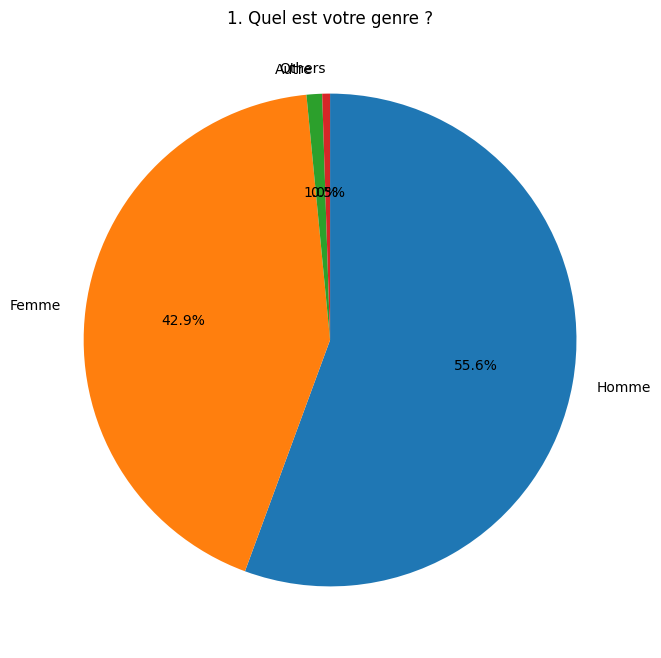

In [577]:
plot_pie('gender', '1. Quel est votre genre ?')

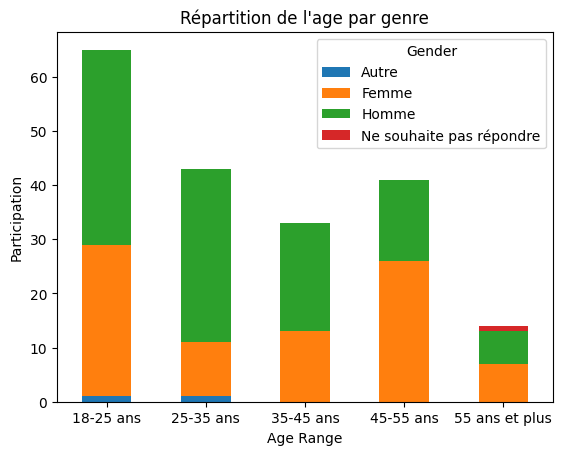

In [578]:
# 1/2 Age Distribution by Gender
age_gender = df_survey.groupby(['age_range', 'gender']).size().unstack()
age_gender.plot(kind='bar', stacked=True)
plt.title('Répartition de l\'age par genre')
plt.xlabel('Age Range')
plt.ylabel('Participation')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

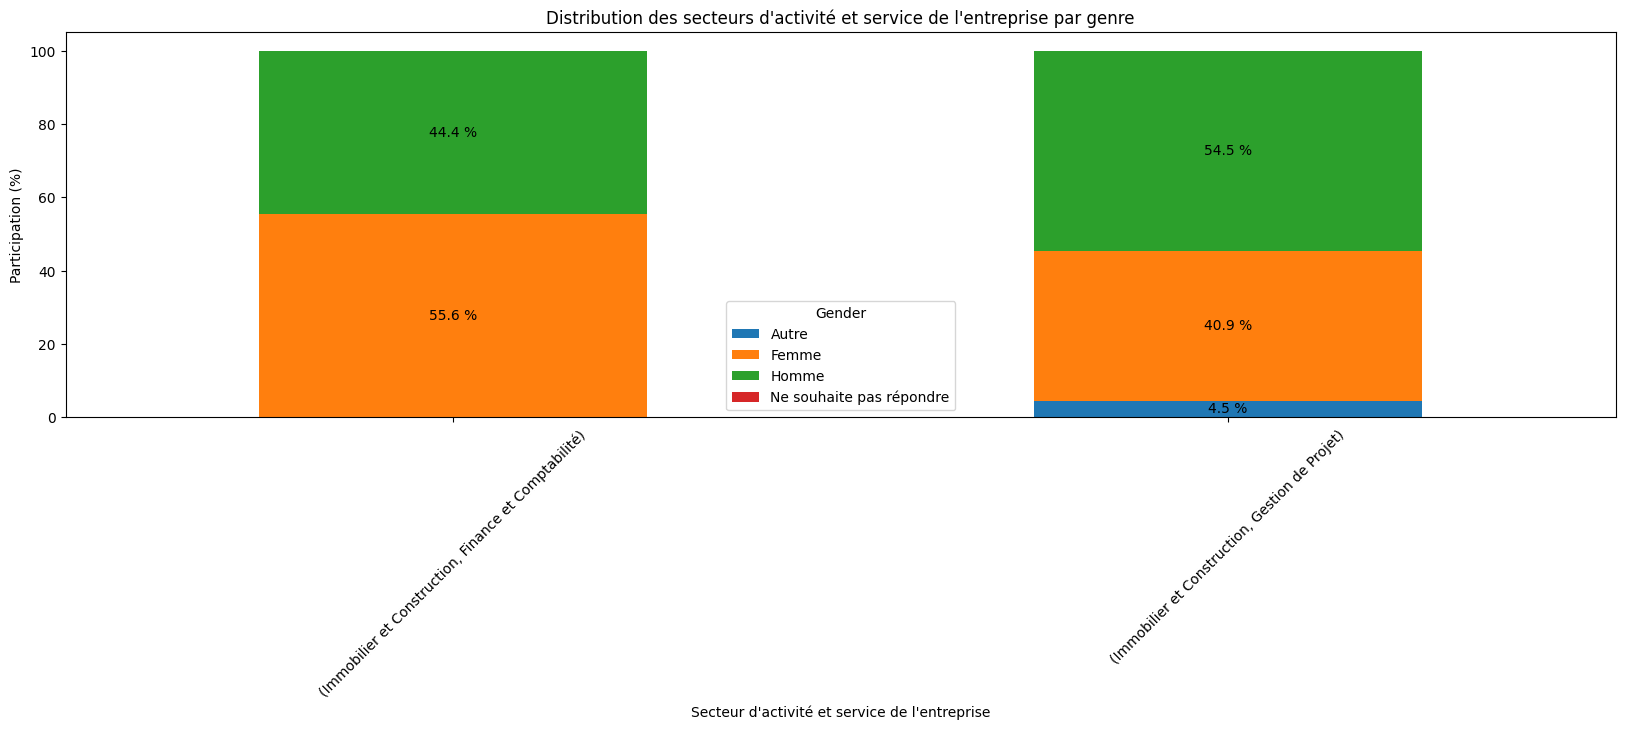

In [579]:
# 1/3&4 Sector and Departement by Gender
gender_distribution = df_survey.groupby(['industry_sector', 'company_department', 'gender']).size().unstack()
MIN_PARTICIPATION_FILTER = 10
total_count = gender_distribution.sum(axis=1)
valid_sectors_departments = total_count[total_count > MIN_PARTICIPATION_FILTER].index
gender_distribution_filtered = gender_distribution.loc[valid_sectors_departments]

# Calculate percentage
gender_distribution_percentage = gender_distribution_filtered.div(gender_distribution_filtered.sum(axis=1), axis=0) * 100

# Plot the data
ax = gender_distribution_percentage.plot(kind='bar', stacked=True, figsize=(20,5))
plt.title('Distribution des secteurs d\'activité et service de l\'entreprise par genre')
plt.xlabel('Secteur d\'activité et service de l\'entreprise')
plt.ylabel('Participation (%)')
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Add percentage text on each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Only add text if percentage is greater than 0
        ax.text(x+width/2,
                y+height/2,
                '{:.1f} %'.format(height),
                horizontalalignment='center',
                verticalalignment='center')

plt.show()

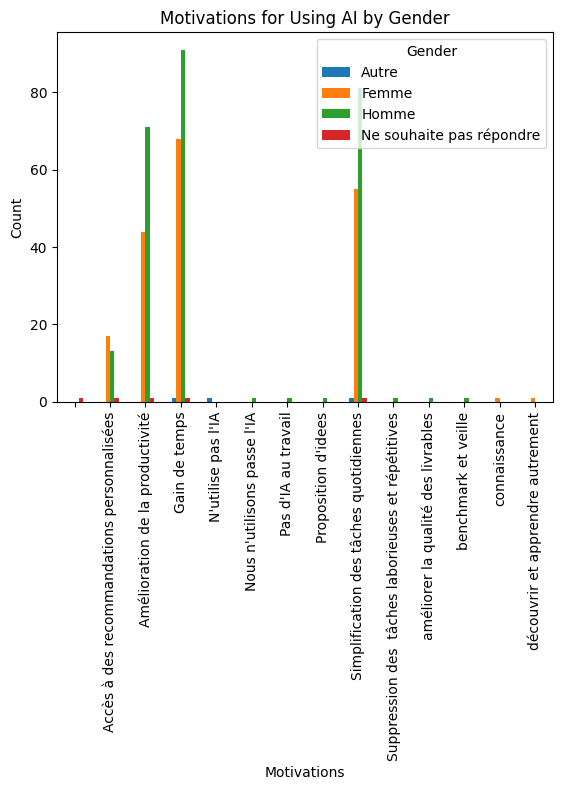

In [580]:
# 1/10 Motivations for Using AI by Gender
# Explode the sets into individual rows
df_explod_motivations = df_survey.explode('motivations_for_using_ai')

# Group by and unstack to create the plot
motivations_gender = df_explod_motivations.groupby(['motivations_for_using_ai', 'gender']).size().unstack()
motivations_gender.plot(kind='bar')
plt.title('Motivations for Using AI by Gender')
plt.xlabel('Motivations')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# ❓ Question 2: Dans quelle tranche d’âge vous situez-vous ?

- [ ] 2/3&4 Répartition des secteurs d'activité et services par tranche d'âge
- [x] 2/5 Familiarité avec l'IA par tranche d'âge
- [ ] 2/6 Réfractarité à l’utilisation de l'IA au travail par tranche d'âge
- [x] 2/7 Ouverture à l'utilisation des outils utilisant l'IA par tranche d'âge
- [ ] 2/8&9 Utilisation des outils basés sur l'IA et types d'outils utilisés par tranche d'âge
- [ ] 2/10 Motivations pour utiliser des outils basés sur l'IA par tranche d'âge
- [ ] 2/11 Problèmes rencontrés avec les outils basés sur l'IA par tranche d'âge
- [ ] 2/12 Confiance dans les décisions prises par les systèmes basés sur l'IA par tranche d'âge
- [x] 2/13 Inquiétudes quant à l'impact de l'IA sur la vie professionnelle par tranche d'âge
- [x] 2/14 Perception de la perte d'autonomie due à l'IA par tranche d'âge
- [ ] 2/15 Perception de la réduction des capacités de réflexion due à l'IA par tranche d'âge
- [ ] 2/16 Crainte de perdre son emploi à cause de l'IA par tranche d'âge
- [ ] 2/17 Autres inquiétudes face à l'arrivée de l'IA par tranche d'âge
- [ ] 2/18 Inclusion dans le développement d'outils basés sur l'IA par tranche d'âge
- [ ] 2/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par tranche d'âge
- [x] 2/20 Inclination à utiliser l'IA après consultation par tranche d'âge
- [ ] 2/21 Disposition à suivre une formation sur les technologies basées sur l'IA par tranche d'âge
- [ ] 2/22 Commentaires et suggestions sur l'arrivée de l'IA par tranche d'âge

---

<Figure size 1200x800 with 0 Axes>

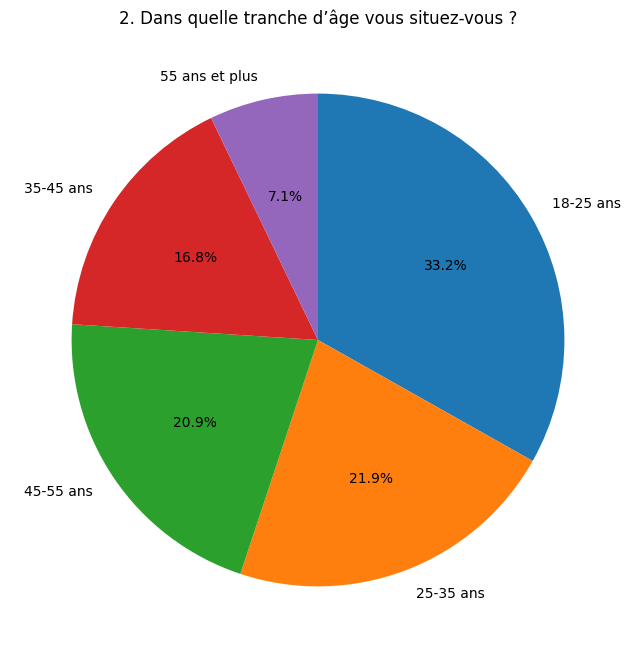

In [581]:
plot_pie('age_range', '2. Dans quelle tranche d’âge vous situez-vous ?')

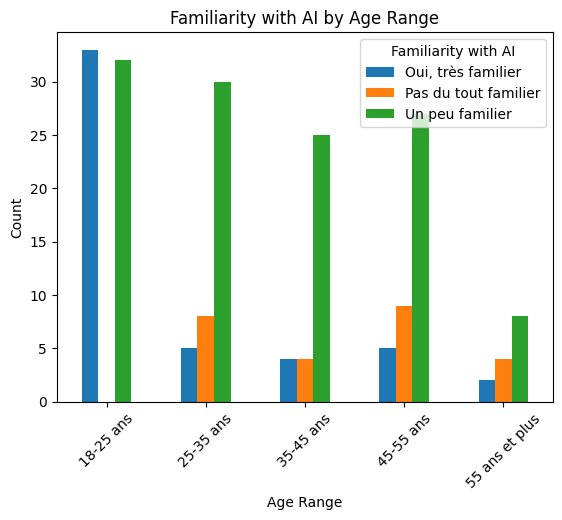

In [582]:
# 2/5 Familiarity with AI by Age Range
familiarity_age = df_survey.groupby(['age_range', 'familiar_with_ai']).size().unstack()
familiarity_age.plot(kind='bar')
plt.title('Familiarity with AI by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Familiarity with AI')
plt.show()

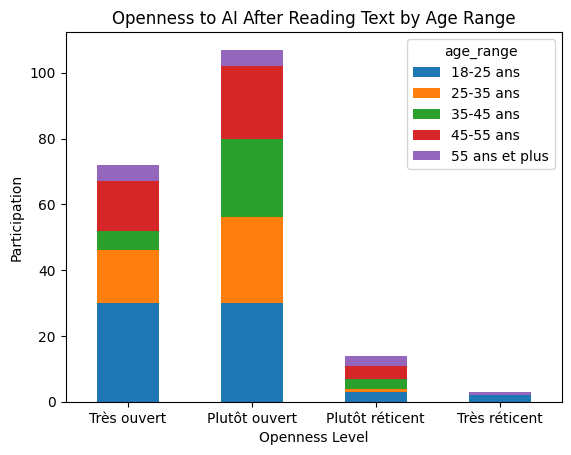

In [583]:
# 2/7 Openness to AI After Reading Text by Age Range
openness_age = df_survey.groupby([
  'age_range',
  'openness_to_ai_after_text'
]).size().unstack(0).reindex([
  'Très ouvert',
  'Plutôt ouvert',
  'Plutôt réticent',
  'Très réticent'
])
openness_age.plot(kind='bar', stacked=True)
plt.title('Openness to AI After Reading Text by Age Range')
plt.xlabel('Openness Level')
plt.ylabel('Participation')
plt.xticks(rotation=0)
plt.show()

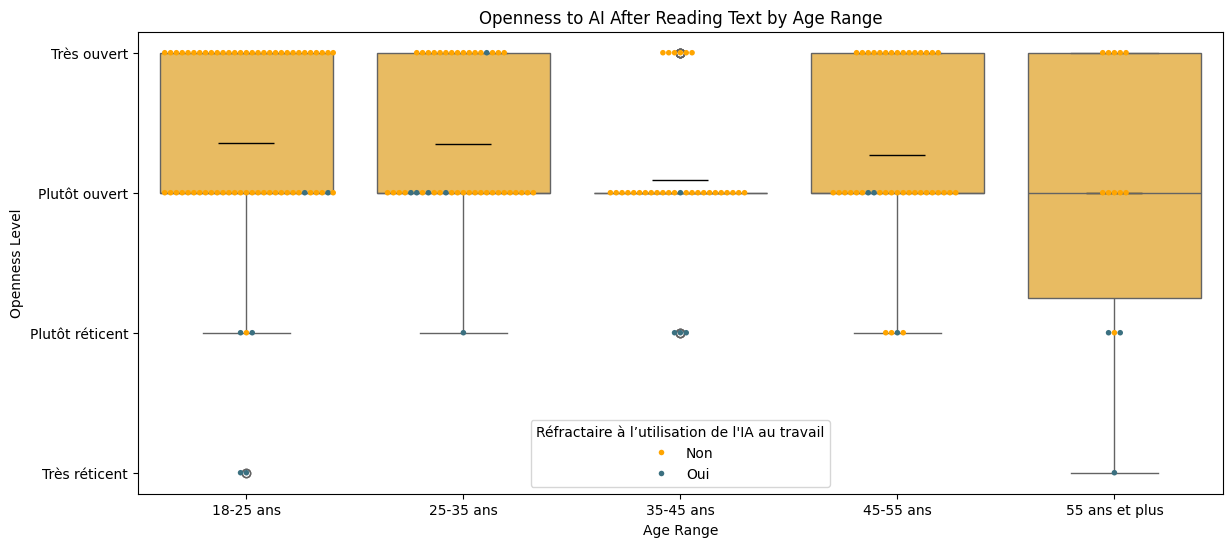

,timestamp,gender,age_range,_industry_sector,_company_department,familiar_with_ai,resistant_to_ai,openness_to_ai_after_text,current_ai_usage,tools_used,...,comments_and_suggestions_about_ai,industry_sector,company_department,support_department,*familiar_with_ai,*openness_to_ai_after_text,*current_ai_usage,*loss_of_autonomy_due_to_ai,*reduced_thinking_due_to_ai,*willingness_for_ai_training
28,06/05/2024 19:52:50,Femme,18-25 ans,Construction et génie civil,Gestion de projet,Un peu familier,Oui,Plutôt ouvert,Jamais,{Reconnaissance faciale/biometrique},...,NaN,Immobilier et Construction,Gestion de Projet,opé,1,2,0,0.0,1.0,1
37,07/05/2024 08:25:51,Homme,35-45 ans,Technologies de l'information et de la communi...,IT (Technologies de l'Information),Un peu familier,Non,Plutôt ouvert,Parfois,"{Reconnaissance faciale/biometrique, Language ...",...,NaN,TIC,TIC,opé,1,2,2,1.0,NaN,2
113,13/05/2024 18:07:12,Femme,18-25 ans,Immobilier,Direction,Un peu familier,Non,Très ouvert,Rarement,"{Reconnaissance faciale/biometrique, Language ...",...,NaN,Immobilier et Construction,Direction et Management,dir,1,3,1,1.0,2.0,2
132,14/05/2024 15:21:06,Femme,35-45 ans,Transport et logistique,Controleur aerien,Un peu familier,Oui,Plutôt ouvert,Rarement,"{Reconnaissance faciale/biometrique, Autres, L...",...,NaN,Transport et Logistique,Aéronautique et Navigation Aérienne,opé,1,2,1,3.0,3.0,2
135,14/05/2024 15:55:20,Homme,45-55 ans,Industrie,Direction,"Oui, très familier",Non,Très ouvert,Parfois,"{Reconnaissance faciale/biometrique, Language ...",...,L'IA va accélérer le tempo des entreprises en ...,Industrie et Technique,Direction et Management,dir,2,3,2,0.0,0.0,2


In [584]:
# 2/7 Mean Openness Level to AI After Reading Text by Age Range
df_openness = df_survey[['age_range', '*openness_to_ai_after_text', 'resistant_to_ai']].copy()

age_order = ["18-25 ans", "25-35 ans", "35-45 ans", "45-55 ans", "55 ans et plus"]
df_openness['age_range'] = pd.Categorical(df_openness['age_range'], categories=age_order, ordered=True)
df_openness = df_openness.sort_values('age_range').reset_index(drop=True)

plt.figure(figsize=(14, 6))
sns.boxplot(x='age_range', y='*openness_to_ai_after_text', data=df_openness, color="#FFC34B")
sns.swarmplot(x='age_range', y='*openness_to_ai_after_text', data=df_openness, hue='resistant_to_ai', palette=['orange', '#3B7080'], size=4)
sns.pointplot(x='age_range', y='*openness_to_ai_after_text', data=df_openness, errorbar=None, color="black", linestyle="none", capsize=.2, marker="_", markersize=40, markeredgewidth=1,)
plt.legend(title='Réfractaire à l’utilisation de l\'IA au travail')
plt.title('Openness to AI After Reading Text by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Openness Level')
plt.xticks(rotation=0)
plt.yticks([0, 1, 2, 3], ['Très réticent', 'Plutôt réticent', 'Plutôt ouvert', 'Très ouvert'])
plt.show()

# we can now plot outliers (18-25 ans, Très réticent) & (35-45 ans, Très réticent)
df_outliers = df_survey[
  ((df_openness['age_range'] == '18-25 ans')
  & (df_openness['*openness_to_ai_after_text'] == 0))
  | ((df_openness['age_range'] == '35-45 ans')
  & (df_openness['*openness_to_ai_after_text'] <= 1))
]

display(df_outliers)


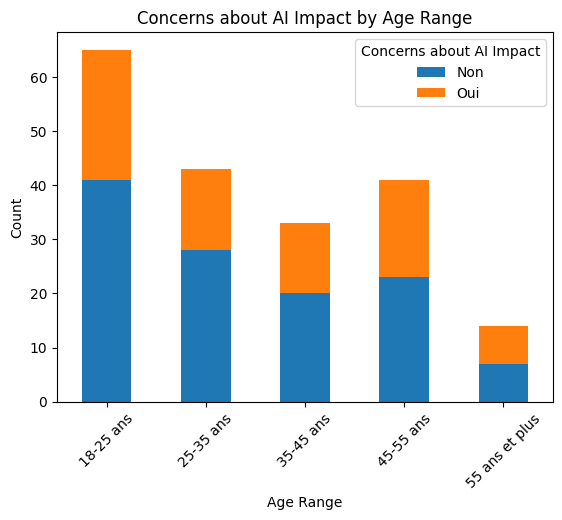

In [585]:
# 2/13 Concerns about AI Impact by Age Range
concerns_age = df_survey.groupby('age_range')['concerns_about_ai_impact'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Concerns about AI Impact by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Concerns about AI Impact')
plt.show()

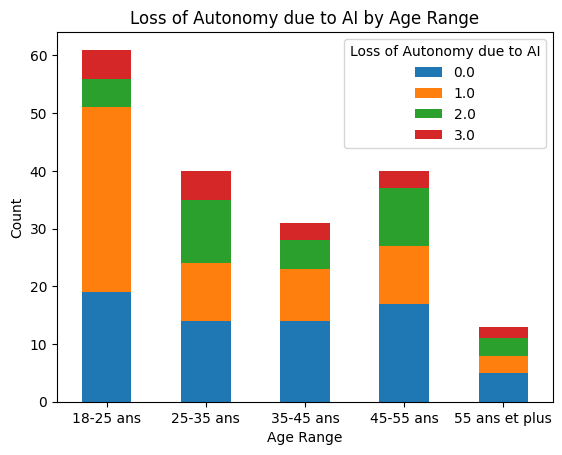

In [586]:
# 2/14 Loss of Autonomy due to AI by Age Range

loss_autonomy_gender = df_survey.groupby('age_range')[
    '*loss_of_autonomy_due_to_ai'
].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Loss of Autonomy due to AI by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loss of Autonomy due to AI')
plt.show()

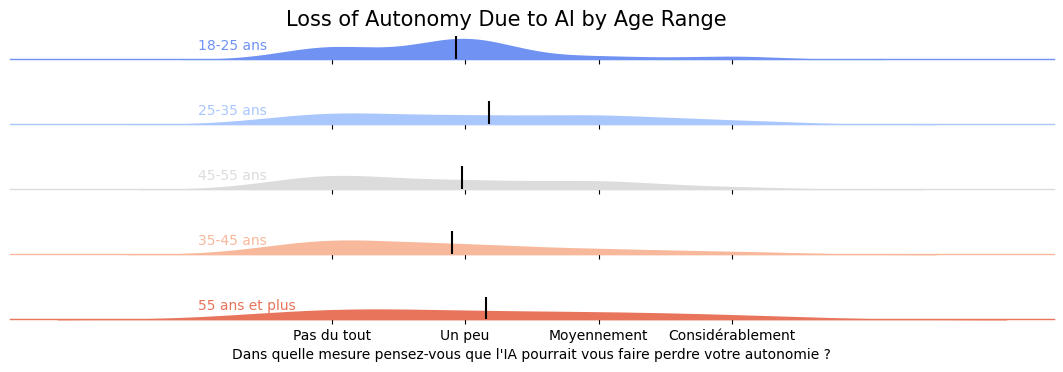

In [587]:
# Generate a color palette with Seaborn
pal = sns.color_palette(palette='coolwarm', n_colors=len(df_survey['age_range'].unique()))

# Create the FacetGrid object
g = sns.FacetGrid(df_survey, row='age_range', hue='age_range', aspect=15, height=0.75, palette=pal)

# Add the densities kdeplots for each age range
g.map(sns.kdeplot, '*loss_of_autonomy_due_to_ai',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# Add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, '*loss_of_autonomy_due_to_ai',
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# Add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=1, clip_on=False)

# Add age range as text with the right color
for i, ax in enumerate(g.axes.flat):
    ax.text(-1, 0.25, df_survey['age_range'].unique()[i],
            fontsize=10,
            color=ax.lines[-1].get_color())

    mean_value = df_survey[df_survey['age_range'] == df_survey['age_range'].unique()[i]]['*loss_of_autonomy_due_to_ai'].mean()
    ax.axvline(mean_value, color='black')

# Remove axes titles, yticks, and spines
g.set_titles("")
g.set(yticks=[])
g.set(ylabel="")  # Remove y label
g.despine(bottom=True, left=True)


g.fig.suptitle('Loss of Autonomy Due to AI by Age Range', fontsize=15)
plt.xlabel('Dans quelle mesure pensez-vous que l\'IA pourrait vous faire perdre votre autonomie ?')

labels = ['Pas du tout', 'Un peu', 'Moyennement', 'Considérablement']
g.set(xticks=range(0, 4), xticklabels=labels)

plt.show()

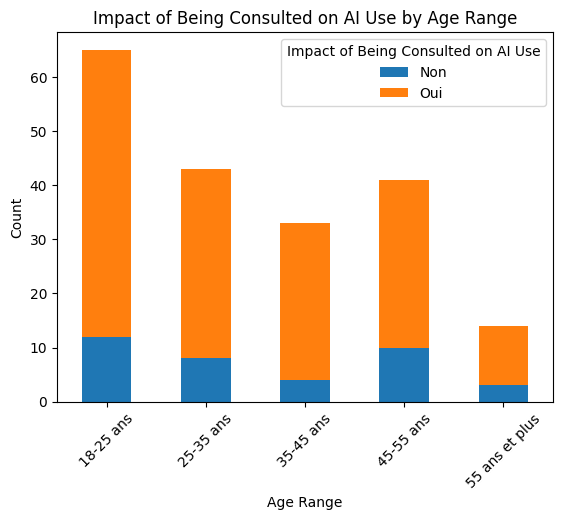

In [588]:
# 2/20 Impact of Being Consulted on AI Use by Age Range
impact_consulted_age = df_survey.groupby('age_range')['impact_of_being_consulted_on_ai_use'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Impact of Being Consulted on AI Use by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Impact of Being Consulted on AI Use')
plt.show()

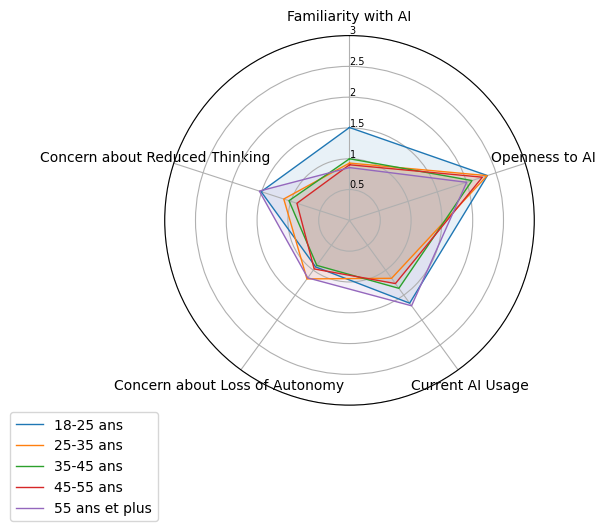

In [589]:
# Group by age range and calculate mean
age_general_data = df_survey.groupby('age_range')[[
    '*familiar_with_ai',
    '*openness_to_ai_after_text',
    '*current_ai_usage',
    '*loss_of_autonomy_due_to_ai',
    '*reduced_thinking_due_to_ai'
]].mean()

age_general_data.rename(columns={
    '*familiar_with_ai': 'Familiarity with AI',
    '*openness_to_ai_after_text': 'Openness to AI',
    '*current_ai_usage': 'Current AI Usage',
    '*loss_of_autonomy_due_to_ai': 'Concern about Loss of Autonomy',
    '*reduced_thinking_due_to_ai': 'Concern about Reduced Thinking'
}, inplace=True)

# Reset index to make 'age_range' a column again
age_general_data.reset_index(inplace=True)

# Rename 'age_range' to 'age_group' to match the previous example
age_general_data.rename(columns={'age_range': 'age_group'}, inplace=True)

# number of variable
survey_categories = list(age_general_data)[1:]
num_categories = len(survey_categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
axis_angles = [n / float(num_categories) * 2 * pi for n in range(num_categories)]
axis_angles += axis_angles[:1]

# Initialise the spider plot
spider_plot = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
spider_plot.set_theta_offset(pi / 2)
spider_plot.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(axis_angles[:-1], survey_categories)

# Draw ylabels
spider_plot.set_rlabel_position(0)
plt.yticks([0.5, 1, 1.5, 2, 2.5, 3], ["0.5", "1", "1.5", "2", "2.5", "3"], color="black", size=7)
plt.ylim(0,3)

# Plot each individual = each line of the data
for i, row in age_general_data.iterrows():
    category_values = row.drop('age_group').values.flatten().tolist()
    category_values += category_values[:1]
    spider_plot.plot(axis_angles, category_values, linewidth=1, linestyle='solid', label=str(row['age_group']))
    spider_plot.fill(axis_angles, category_values, alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0, 0))
plt.show()

# ❓ 3&4. Dans quel secteur d'activité êtes vous ?

- [x] 3&4/5 Familiarité avec l'IA par secteur d'activité et service
- [ ] 3&4/6 Réfractarité à l’utilisation de l'IA au travail par secteur d'activité et service
- [ ] 3&4/7 Ouverture à l'utilisation des outils utilisant l'IA par secteur d'activité et service
- [x] 3&4/8&9 Utilisation des outils basés sur l'IA et types d'outils utilisés par secteur d'activité et service
- [x] 3&4/10 Motivations pour utiliser des outils basés sur l'IA par secteur d'activité et service
- [ ] 3&4/11 Problèmes rencontrés avec les outils basés sur l'IA par secteur d'activité et service
- [ ] 3&4/12 Confiance dans les décisions prises par les systèmes basés sur l'IA par secteur d'activité et service
- [ ] 3&4/13 Inquiétudes quant à l'impact de l'IA sur la vie professionnelle par secteur d'activité et service
- [ ] 3&4/14 Perception de la perte d'autonomie due à l'IA par secteur d'activité et service
- [ ] 3&4/15 Perception de la réduction des capacités de réflexion due à l'IA par secteur d'activité et service
- [ ] 3&4/16 Crainte de perdre son emploi à cause de l'IA par secteur d'activité et service
- [ ] 3&4/17 Autres inquiétudes face à l'arrivée de l'IA par secteur d'activité et service
- [ ] 3&4/18 Inclusion dans le développement d'outils basés sur l'IA par secteur d'activité et service
- [ ] 3&4/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par secteur d'activité et service
- [ ] 3&4/20 Inclination à utiliser l'IA après consultation par secteur d'activité et service
- [ ] 3&4/21 Disposition à suivre une formation sur les technologies basées sur l'IA par secteur d'activité et service
- [ ] 3&4/22 Commentaires et suggestions sur l'arrivée de l'IA par secteur d'activité et service

---

<Figure size 1200x800 with 0 Axes>

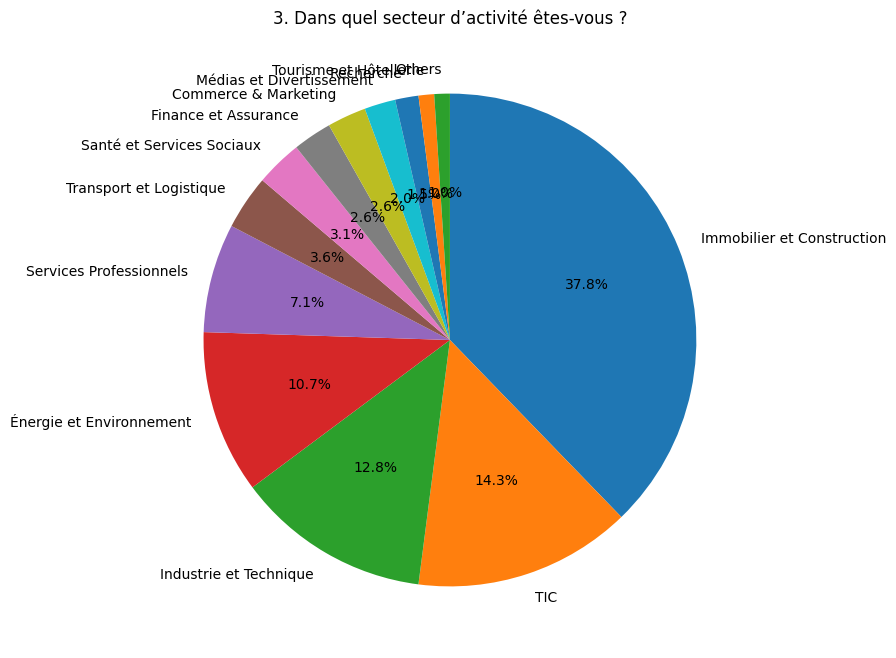

In [590]:
plot_pie('industry_sector', '3. Dans quel secteur d’activité êtes-vous ?')

<Figure size 1200x800 with 0 Axes>

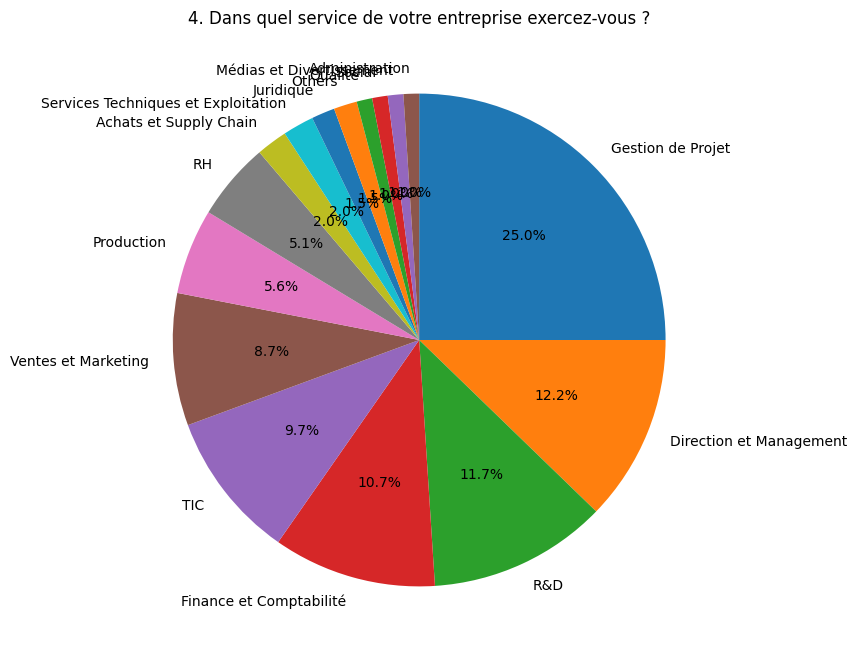

In [591]:
plot_pie('company_department', '4. Dans quel service de votre entreprise exercez-vous ?')

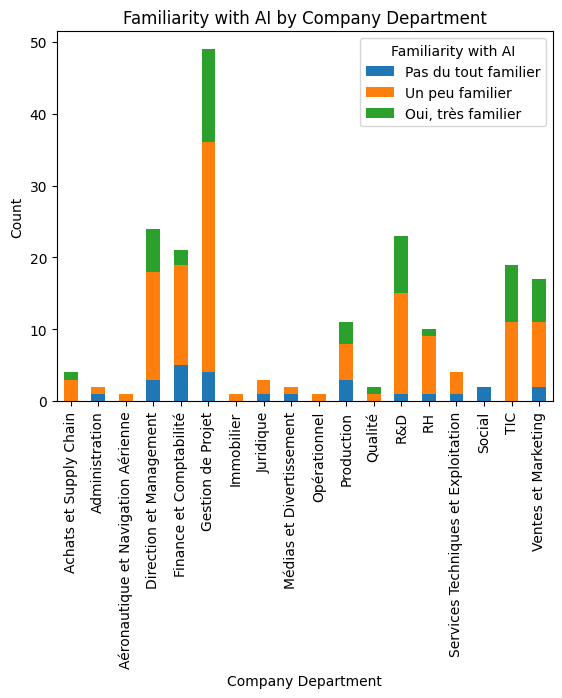

In [592]:
# 3&4/5 Familiarity with AI by Company Department
# faire le 3
familiarity_department = df_survey.groupby('company_department')[
    'familiar_with_ai'
].value_counts().unstack().reindex(columns=[
    'Pas du tout familier',
    'Un peu familier',
    'Oui, très familier'
]).plot(kind='bar', stacked=True)
plt.title('Familiarity with AI by Company Department')
plt.xlabel('Company Department')
plt.ylabel('Count')
plt.legend(title='Familiarity with AI')
plt.show()

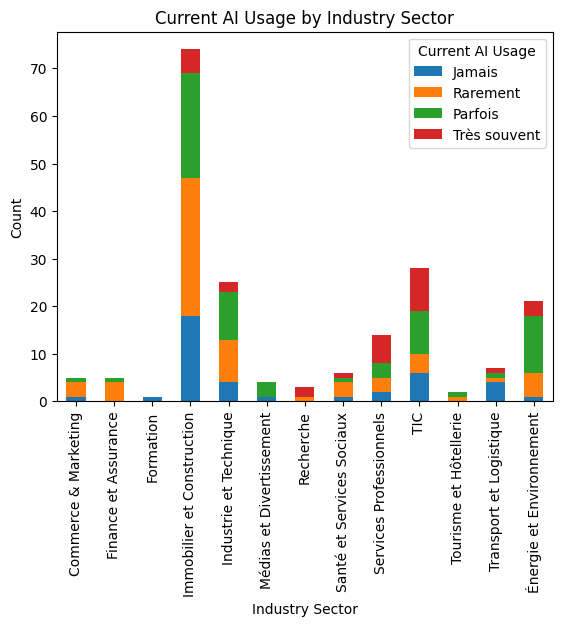

In [593]:
# 3&4/8 Current AI Usage by Industry Sector
# a revoir y'a que 3
# rajouter les tools ?
current_usage_sector = df_survey.groupby('industry_sector')['current_ai_usage'].value_counts().unstack().reindex(columns=[
  'Jamais',
  'Rarement',
  'Parfois',
  'Très souvent'
])
current_usage_sector.drop('Unknown', inplace=True, axis=0)
current_usage_sector.plot(kind='bar', stacked=True)
plt.title('Current AI Usage by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Count')
plt.legend(title='Current AI Usage')
plt.show()

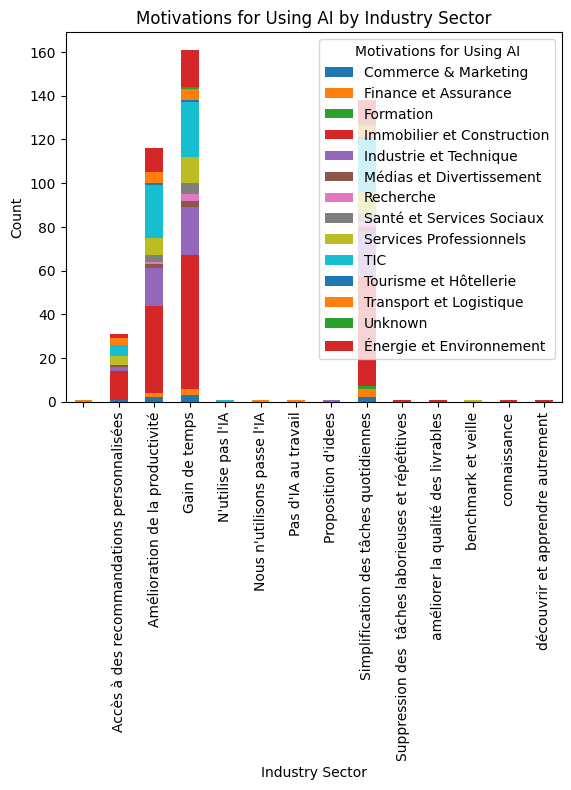

In [594]:
# 3&4/10 Motivations for Using AI by Industry Sector
motivations_sector = df_explod_motivations.groupby('motivations_for_using_ai')['industry_sector'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Motivations for Using AI by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Count')
plt.legend(title='Motivations for Using AI')
plt.show()

# ❓ 5. Êtes-vous familier avec l'IA ?
- [ ] 5/6 Réfractarité à l’utilisation de l'IA au travail par familiarité avec l'IA
- [ ] 5/7 Ouverture à l'utilisation des outils utilisant l'IA par familiarité avec l'IA
- [x] 5/8&9 Utilisation des outils basés sur l'IA et types d'outils utilisés par familiarité avec l'IA
- [ ] 5/10 Motivations pour utiliser des outils basés sur l'IA par familiarité avec l'IA
- [x] 5/11 Problèmes rencontrés avec les outils basés sur l'IA par familiarité avec l'IA
- [x] 5/12 Confiance dans les décisions prises par les systèmes basés sur l'IA par familiarité avec l'IA
- [ ] 5/13 Inquiétudes quant à l'impact de l'IA sur la vie professionnelle par familiarité avec l'IA
- [ ] 5/14 Perception de la perte d'autonomie due à l'IA par familiarité avec l'IA
- [ ] 5/15 Perception de la réduction des capacités de réflexion due à l'IA par familiarité avec l'IA
- [x] 5/16 Crainte de perdre son emploi à cause de l'IA par familiarité avec l'IA
- [ ] 5/17 Autres inquiétudes face à l'arrivée de l'IA par familiarité avec l'IA
- [ ] 5/18 Inclusion dans le développement d'outils basés sur l'IA par familiarité avec l'IA
- [ ] 5/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par familiarité avec l'IA
- [ ] 5/20 Inclination à utiliser l'IA après consultation par familiarité avec l'IA
- [ ] 5/21 Disposition à suivre une formation sur les technologies basées sur l'IA par familiarité avec l'IA
- [ ] 5/22 Commentaires et suggestions sur l'arrivée de l'IA par familiarité avec l'IA

---

<Figure size 1200x800 with 0 Axes>

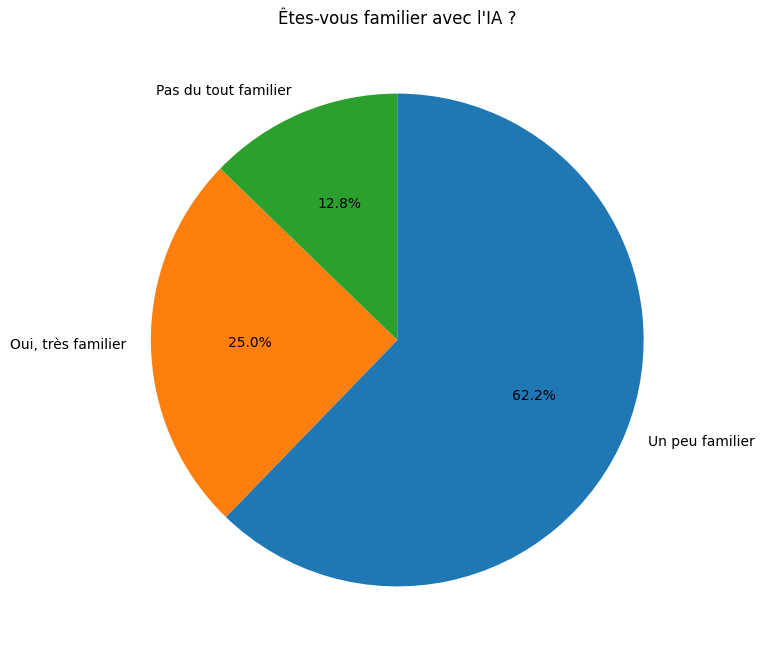

In [595]:
plot_pie('familiar_with_ai', 'Êtes-vous familier avec l\'IA ?')

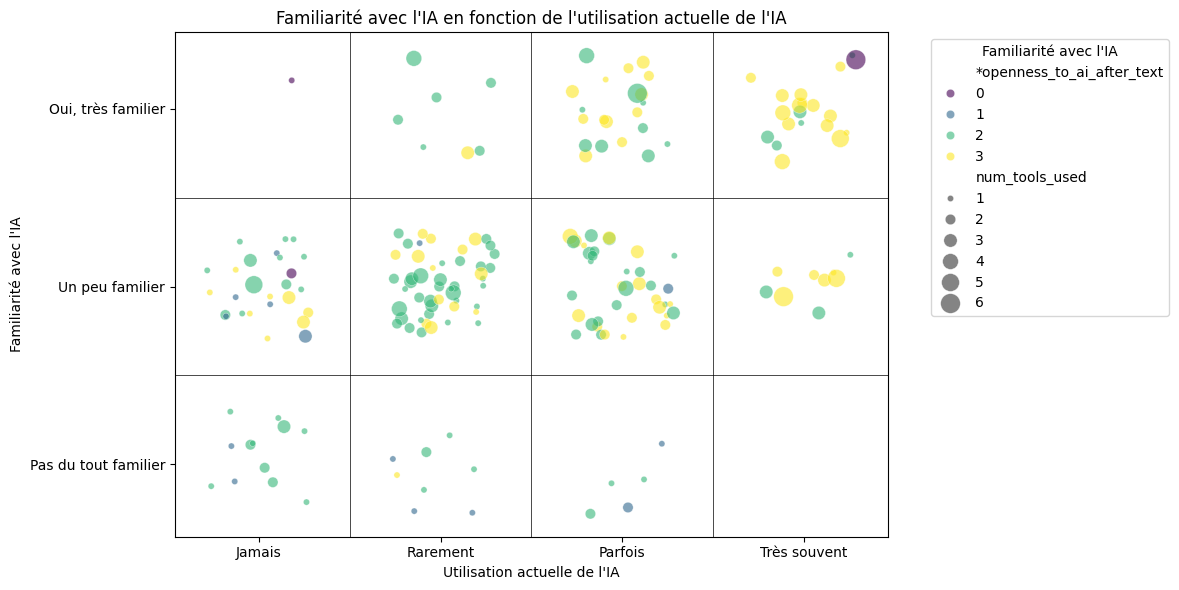

In [596]:
# 5/8&9 Check familiarity with AI avec "current_ai_usage" et "tools_used"
## later we will maybe link it to the type of work
df_familiarity_tools = df_survey[['*familiar_with_ai', '*current_ai_usage', 'tools_used', '*openness_to_ai_after_text']].copy()

df_familiarity_tools['num_tools_used'] = df_familiarity_tools['tools_used'].apply(len)

jitter_strength = 0.3
df_familiarity_tools['*familiar_with_ai'] = df_familiarity_tools['*familiar_with_ai'].apply(lambda x: x + np.random.uniform(-jitter_strength, jitter_strength))
df_familiarity_tools['*current_ai_usage'] = df_familiarity_tools['*current_ai_usage'].apply(lambda x: x + np.random.uniform(-jitter_strength, jitter_strength))

# Visualisation avec seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_familiarity_tools, x='*current_ai_usage', y='*familiar_with_ai', size='num_tools_used',
  sizes=(20, 200), hue='*openness_to_ai_after_text', palette='viridis', alpha=0.6)

for x in range(3):
    plt.axvline(x+0.5, color='black', linewidth=0.5)
for y in range(2):
    plt.axhline(y+0.5, color='black', linewidth=0.5)

plt.title('Familiarité avec l\'IA en fonction de l\'utilisation actuelle de l\'IA')
plt.xlabel('Utilisation actuelle de l\'IA')
plt.xticks([0, 1, 2, 3], ['Jamais', 'Rarement', 'Parfois', 'Très souvent'])
plt.ylabel('Familiarité avec l\'IA')
plt.yticks([0, 1, 2], ['Pas du tout familier', 'Un peu familier', 'Oui, très familier'])
plt.legend(title='Familiarité avec l\'IA', bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

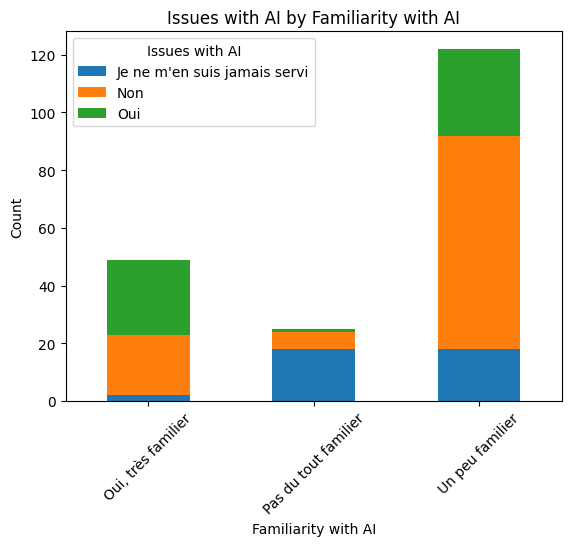

In [597]:
# 5/11 Issues with AI by Familiarity with AI
# faire les details en plus dans le graph
issues_familiarity = df_survey.groupby('familiar_with_ai')['issues_with_ai'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Issues with AI by Familiarity with AI')
plt.xlabel('Familiarity with AI')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Issues with AI')
plt.show()

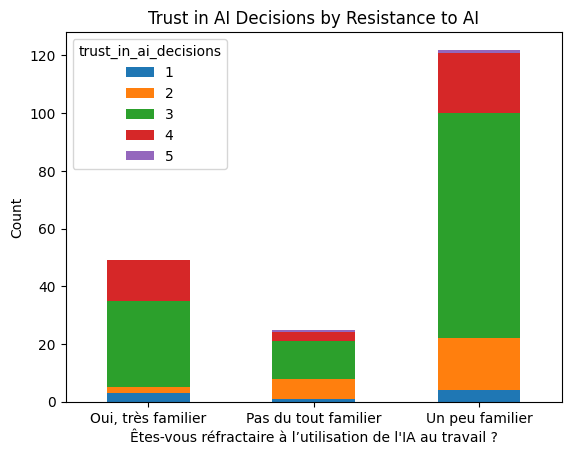

In [598]:
# 5/12 Trust in AI Decisions by Familiarity with AI
# Les gens qui trust connaissent bien la techno : on peut vérifier ça aussi avec "current_ai_usage" et "tools_used" mais attention c'est lié au taff
trust_resistance = df_survey.groupby('familiar_with_ai')['trust_in_ai_decisions'].value_counts().unstack()
trust_resistance.plot(kind='bar', stacked=True)
plt.title('Trust in AI Decisions by Resistance to AI')
plt.xlabel('Êtes-vous réfractaire à l’utilisation de l\'IA au travail ?')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

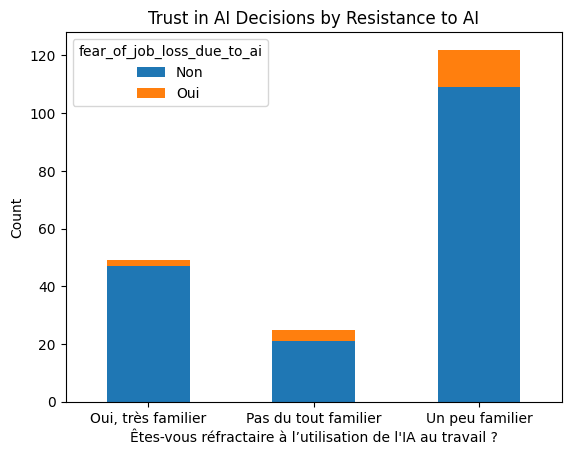

In [599]:
# 5/16 familiar_with_ai by fear_of_job_loss_due_to_ai
#? Les gens ont peur quand ils ne connaissent pas : on peut vérifier ça aussi avec "current_ai_usage" et "tools_used" mais attention c'est lié au taff
trust_resistance = df_survey.groupby('familiar_with_ai')['fear_of_job_loss_due_to_ai'].value_counts().unstack()
trust_resistance.plot(kind='bar', stacked=True)
plt.title('Trust in AI Decisions by Resistance to AI')
plt.xlabel('Êtes-vous réfractaire à l’utilisation de l\'IA au travail ?')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# ❓ 6. Êtes-vous réfractaire à l’utilisation de l'IA au travail ?
- [ ] 6/7 Ouverture à l'utilisation des outils utilisant l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/8&9 Utilisation des outils basés sur l'IA et types d'outils utilisés par réfractarité à l’utilisation de l'IA
- [ ] 6/10 Motivations pour utiliser des outils basés sur l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/11 Problèmes rencontrés avec les outils basés sur l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/12 Confiance dans les décisions prises par les systèmes basés sur l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/13 Inquiétudes quant à l'impact de l'IA sur la vie professionnelle par réfractarité à l’utilisation de l'IA
- [ ] 6/14 Perception de la perte d'autonomie due à l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/15 Perception de la réduction des capacités de réflexion due à l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/16 Crainte de perdre son emploi à cause de l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/17 Autres inquiétudes face à l'arrivée de l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/18 Inclusion dans le développement d'outils basés sur l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/20 Inclination à utiliser l'IA après consultation par réfractarité à l’utilisation de l'IA
- [ ] 6/21 Disposition à suivre une formation sur les technologies basées sur l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/22 Commentaires et suggestions sur l'arrivée de l'IA par réfractarité à l’utilisation de l'IA

---

<Figure size 1200x800 with 0 Axes>

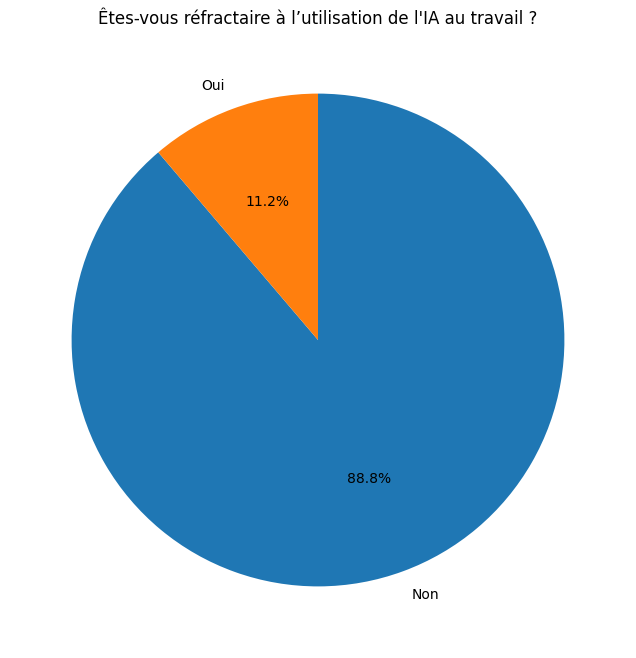

In [600]:
plot_pie('resistant_to_ai', 'Êtes-vous réfractaire à l’utilisation de l\'IA au travail ?')

✅ ON GARDE :  les deux vars sont décorélés 

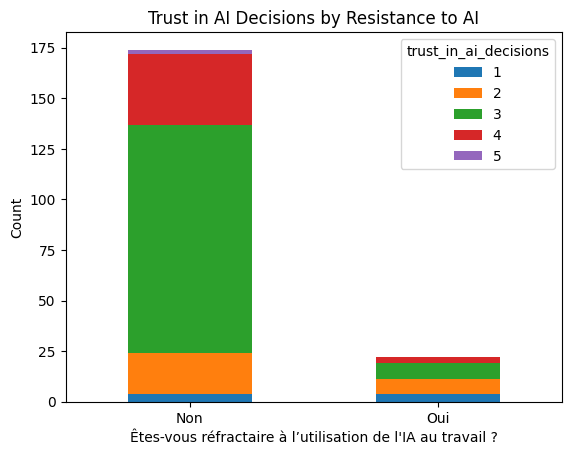

,timestamp,gender,age_range,_industry_sector,_company_department,familiar_with_ai,resistant_to_ai,openness_to_ai_after_text,current_ai_usage,tools_used,...,comments_and_suggestions_about_ai,industry_sector,company_department,support_department,*familiar_with_ai,*openness_to_ai_after_text,*current_ai_usage,*loss_of_autonomy_due_to_ai,*reduced_thinking_due_to_ai,*willingness_for_ai_training
68,07/05/2024 16:55:03,Femme,45-55 ans,Immobilier,developpement,Un peu familier,Non,Plutôt ouvert,Rarement,"{Reconnaissance faciale/biometrique, Assistant...",...,NaN,Immobilier et Construction,R&D,opé,1,2,1,2.0,1.0,2
74,07/05/2024 19:35:06,Homme,18-25 ans,Finance et assurance,Vente/Commercialisation,"Oui, très familier",Non,Très ouvert,Parfois,"{Reconnaissance faciale/biometrique, Language ...",...,NaN,Finance et Assurance,Ventes et Marketing,opé,2,3,2,0.0,0.0,2
89,08/05/2024 23:09:56,Homme,25-35 ans,Finance et assurance,R&D,Un peu familier,Non,Plutôt ouvert,Rarement,{Language Model},...,NaN,Finance et Assurance,R&D,opé,1,2,1,3.0,2.0,2
123,14/05/2024 09:41:13,Homme,45-55 ans,Médias et divertissement,Direction,Un peu familier,Non,Plutôt réticent,Parfois,"{Language Model, Assistant vocal}",...,NaN,Médias et Divertissement,Direction et Management,dir,1,1,2,2.0,3.0,1


In [601]:
# 6/12 Trust in AI Decisions by Resistance to AI
trust_resistance = df_survey.groupby('resistant_to_ai')['trust_in_ai_decisions'].value_counts().unstack()
trust_resistance.plot(kind='bar', stacked=True)
plt.title('Trust in AI Decisions by Resistance to AI')
plt.xlabel('Êtes-vous réfractaire à l’utilisation de l\'IA au travail ?')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Certains réponde Non et ont un Trust in AI de 1 ? wtf
condition = (df_survey['trust_in_ai_decisions'] == 1) & (df_survey['resistant_to_ai'] == 'Non')
filtered_df = df_survey[condition]
display(filtered_df)

## 📊 Réfractaire avant / après le texte explicatif DONE

In [648]:
# compare Yes, No from resistant_to_ai with openess_to_ai_after_text

df_before_after = df_survey[['resistant_to_ai', 'openness_to_ai_after_text']].copy()
# rename the columns
df_before_after.rename(columns={'resistant_to_ai': 'before', 'openness_to_ai_after_text': 'after'}, inplace=True)

sankey_dict = {}
sankey_dict_ids = {'root': 0}

for index, row in df_before_after.iterrows():
  for depth in range(len(row)):
    key = row['before']
    key += ', ' + row['after'] if depth > 0 else ""
    if key not in sankey_dict:
      sankey_dict[key] = 1
    else:
      sankey_dict[key] += 1

for key in sankey_dict.keys():
  sankey_dict_ids[key] = len(sankey_dict_ids)

df_sankey = pd.DataFrame(columns=['source', 'target', 'value'])

for key, value in sankey_dict.items():
  if key in 'Oui' or key == 'Non':
    source = 'root'
  else:
    source = key.split(', ')[0]
  df_sankey.loc[len(df_sankey)] = {
      'source': sankey_dict_ids[source],
      'target': sankey_dict_ids[key],
      'value': value
    }

labels = list(sankey_dict_ids.keys())

colors = [
  '#60CA6F' if label.endswith('Très ouvert') else
  '#FFED65' if label.endswith('Plutôt ouvert') else
  '#ECA948' if label.endswith('Plutôt réticent') else
  '#D84637' if label.endswith('Très réticent') else
  '#1982C4' if 'Oui' in label else
  '#594389' if 'Non' in label else
  '#F2D0A9' for label in labels
]

# Create a dictionary to map labels to colors with added transparency
label_to_color_rgba = {
    label: 'rgba({}, {}, {}, 0.3)'.format(
        int(color[1:3], 16),
        int(color[3:5], 16),
        int(color[5:7], 16)
    ) for label, color in zip(labels, colors)
}

# Generate a color scale for the links based on the target node's color with transparency
link_colors_rgba = [
    label_to_color_rgba.get(labels[target], 'rgba(0, 0, 0, 0.8)')
    for target in df_sankey['target']
]

# Add value (number of people) as label for each link
link_labels = [f"{value}" for value in df_sankey['value']]

fig = go.Figure(data=[go.Sankey(
  node = dict(
    pad = 15,
    thickness = 20,
    line = dict(color = "black", width = 0.5),
    label = labels,
    color = colors  # Use the colors list here
  ),
  link = dict(
    source = df_sankey['source'],
    target = df_sankey['target'],
    value = df_sankey['value'],
    label=link_labels,
    color = link_colors_rgba
  )
)], layout=go.Layout(
    height=500,
    font=dict(size=10),
    title='Sankey Diagram of AI Openness Transition'
))

fig.show()


# ❓ 7. Après avoir lu ce texte, à quel point êtes-vous ouvert à l'idée d'utiliser des outils utilisant l'IA ?
- [ ] 7/8&9 Utilisation des outils basés sur l'IA et types d'outils utilisés par ouverture à l'utilisation de l'IA
- [ ] 7/10 Motivations pour utiliser des outils basés sur l'IA par ouverture à l'utilisation de l'IA
- [ ] 7/11 Problèmes rencontrés avec les outils basés sur l'IA par ouverture à l'utilisation de l'IA
- [ ] 7/12 Confiance dans les décisions prises par les systèmes basés sur l'IA par ouverture à l'utilisation de l'IA
- [ ] 7/13 Inquiétudes quant à l'impact de l'IA sur la vie professionnelle par ouverture à l'utilisation de l'IA
- [ ] 7/14 Perception de la perte d'autonomie due à l'IA par ouverture à l'utilisation de l'IA
- [ ] 7/15 Perception de la réduction des capacités de réflexion due à l'IA par ouverture à l'utilisation de l'IA
- [ ] 7/16 Crainte de perdre son emploi à cause de l'IA par ouverture à l'utilisation de l'IA
- [ ] 7/17 Autres inquiétudes face à l'arrivée de l'IA par ouverture à l'utilisation de l'IA
- [ ] 7/18 Inclusion dans le développement d'outils basés sur l'IA par ouverture à l'utilisation de l'IA
- [ ] 7/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par ouverture à l'utilisation de l'IA
- [ ] 7/20 Inclination à utiliser l'IA après consultation par ouverture à l'utilisation de l'IA
- [ ] 7/21 Disposition à suivre une formation sur les technologies basées sur l'IA par ouverture à l'utilisation de l'IA
- [ ] 7/22 Commentaires et suggestions sur l'arrivée de l'IA par ouverture à l'utilisation de l'IA

---

<Figure size 1200x800 with 0 Axes>

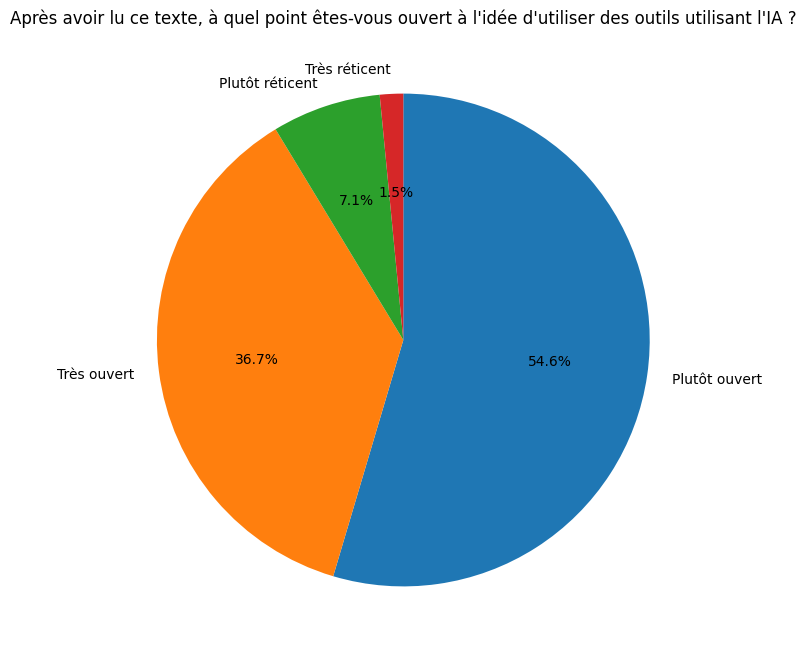

In [ ]:
plot_pie('openness_to_ai_after_text', 'Après avoir lu ce texte, à quel point êtes-vous ouvert à l\'idée d\'utiliser des outils utilisant l\'IA ?')

# ❓ 8&9. Dans le cadre de votre travail, dans quelle mesure utilisez-vous des outils basés sur l'IA ? Utilisez-vous les outils suivants ?
- [x] 8/9 Utilisation des outils basés sur le type d'outils
- [ ] 8&9/10 Motivations pour utiliser des outils basés sur l'IA par utilisation des outils IA et types d'outils
- [ ] 8&9/11 Problèmes rencontrés avec les outils basés sur l'IA par utilisation des outils IA et types d'outils
- [ ] 8&9/12 Confiance dans les décisions prises par les systèmes basés sur l'IA par utilisation des outils IA et types d'outils
- [ ] 8&9/13 Inquiétudes quant à l'impact de l'IA sur la vie professionnelle par utilisation des outils IA et types d'outils
- [ ] 8&9/14 Perception de la perte d'autonomie due à l'IA par utilisation des outils IA et types d'outils
- [ ] 8&9/15 Perception de la réduction des capacités de réflexion due à l'IA par utilisation des outils IA et types d'outils
- [ ] 8&9/16 Crainte de perdre son emploi à cause de l'IA par utilisation des outils IA et types d'outils
- [ ] 8&9/17 Autres inquiétudes face à l'arrivée de l'IA par utilisation des outils IA et types d'outils
- [ ] 8&9/18 Inclusion dans le développement d'outils basés sur l'IA par utilisation des outils IA et types d'outils
- [ ] 8&9/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par utilisation des outils IA et types d'outils
- [ ] 8&9/20 Inclination à utiliser l'IA après consultation par utilisation des outils IA et types d'outils
- [ ] 8&9/21 Disposition à suivre une formation sur les technologies basées sur l'IA par utilisation des outils IA et types d'outils
- [ ] 8&9/22 Commentaires et suggestions sur l'arrivée de l'IA par utilisation des outils IA et types d'outils

---

<Figure size 1200x800 with 0 Axes>

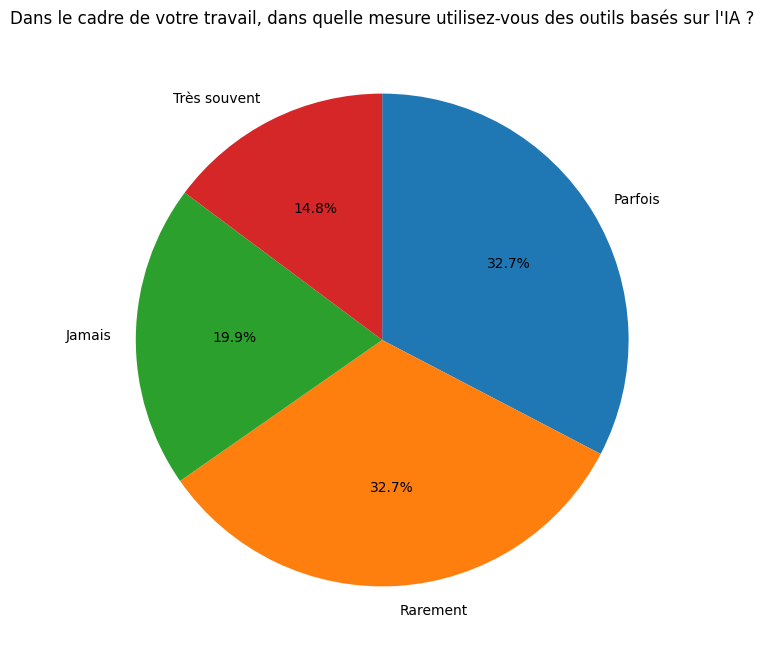

In [ ]:
plot_pie('current_ai_usage', 'Dans le cadre de votre travail, dans quelle mesure utilisez-vous des outils basés sur l\'IA ?')

<Figure size 1200x800 with 0 Axes>

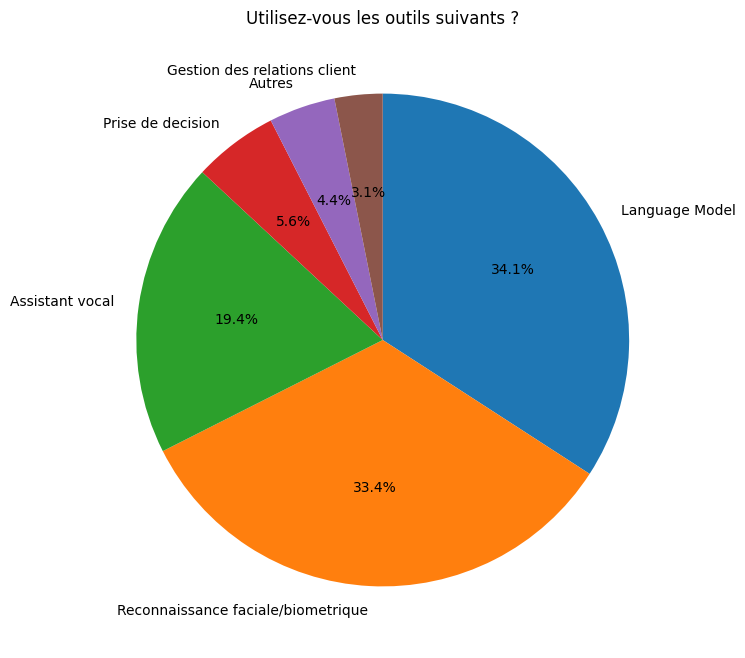

In [ ]:
plot_pie('tools_used', 'Utilisez-vous les outils suivants ?')

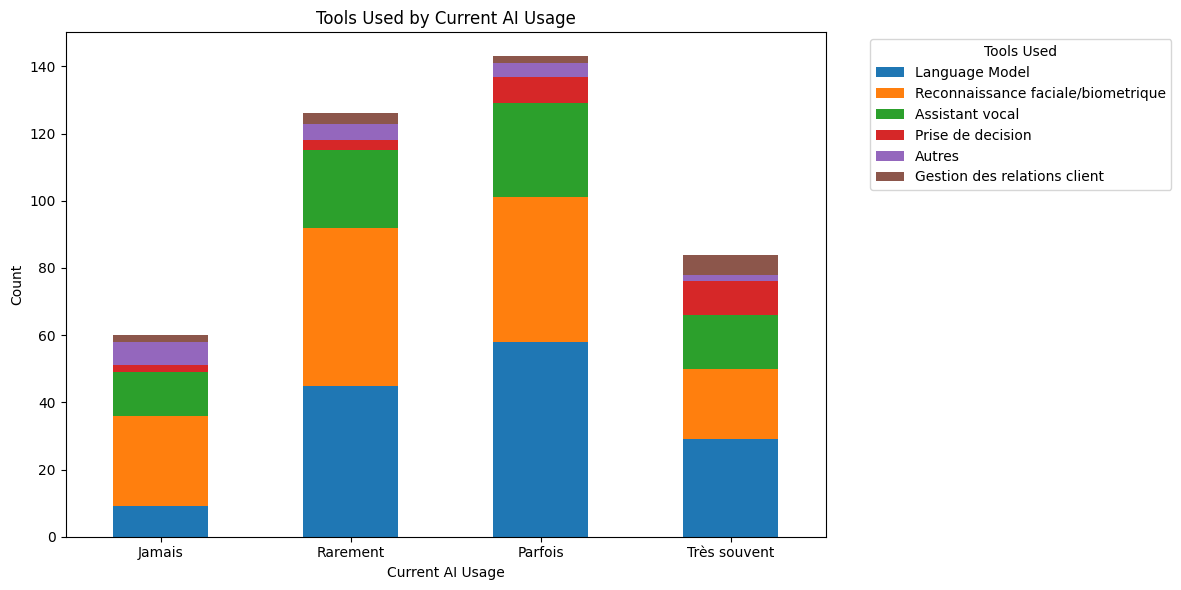

In [ ]:
# 8/9 Tools Used by Current AI Usage
df_exploded = df_survey.explode('tools_used')
df_grouped = df_exploded.groupby(['*current_ai_usage', 'tools_used']).size().unstack().fillna(0)

# Sum the values for each tool and sort them
tool_order = df_grouped.sum().sort_values(ascending=False).index

# Sort the DataFrame according to the tool order
df_grouped = df_grouped[tool_order]

# Plot stacked bar chart
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Tools Used by Current AI Usage')
plt.xlabel('Current AI Usage')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['Jamais', 'Rarement', 'Parfois', 'Très souvent'], rotation=0)
plt.legend(title='Tools Used', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

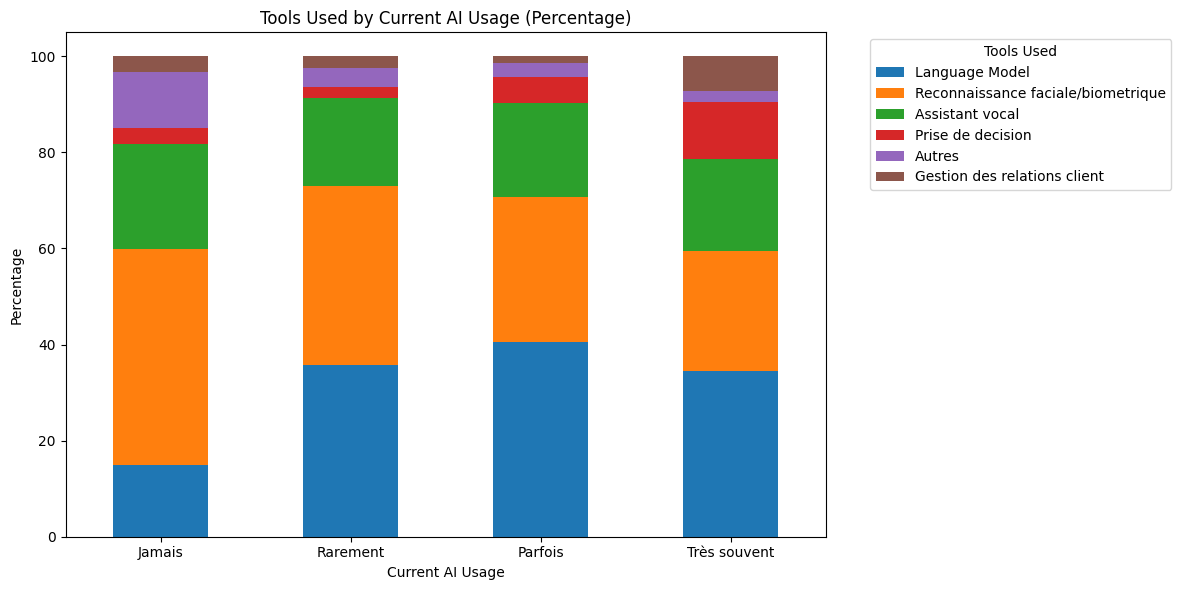

In [ ]:
# Convert the values to percentages
df_grouped_percentage = df_grouped.divide(df_grouped.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
df_grouped_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Tools Used by Current AI Usage (Percentage)')
plt.xlabel('Current AI Usage')
plt.ylabel('Percentage')
plt.xticks([0, 1, 2, 3], ['Jamais', 'Rarement', 'Parfois', 'Très souvent'], rotation=0)
plt.legend(title='Tools Used', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

### 📊 Par technos quelles sont les peurs
#### ceux qui utilisent jamais d'IA, ils ont peur ou pas ?

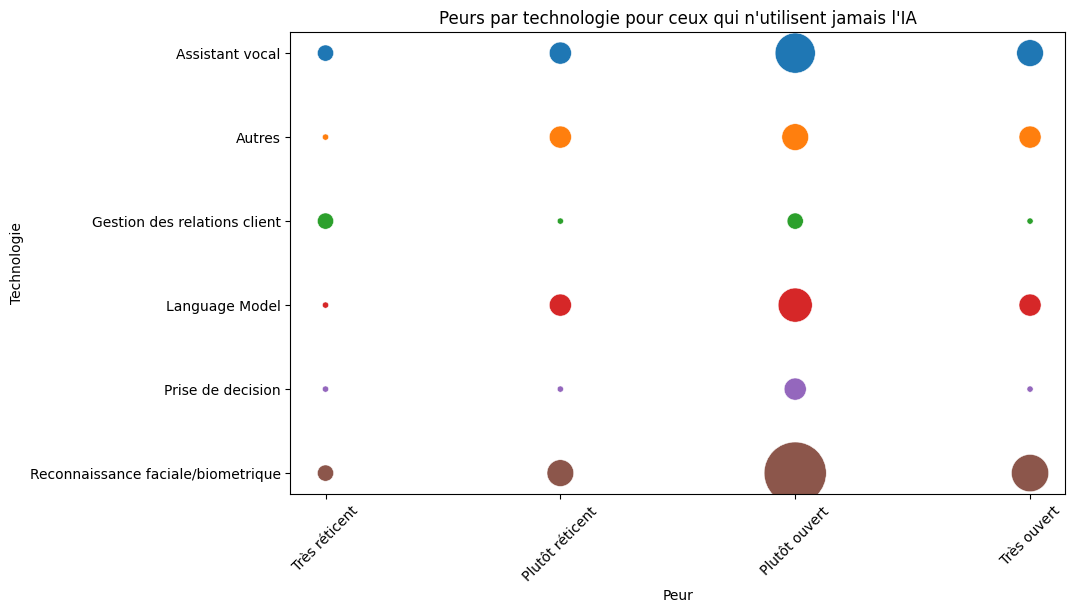

In [ ]:
# 8/9 Tools Used by Current AI Usage
df_exploded = df_survey.explode('tools_used')
df_never_use_ai = df_exploded[df_exploded['*current_ai_usage'] == 0]

# Group by technology and fear, and count the number of responses
fears_by_tech = df_never_use_ai.groupby(['tools_used', '*openness_to_ai_after_text']).size().unstack().fillna(0)

# Calculate total responses for each technology
fears_by_tech['total'] = fears_by_tech.sum(axis=1)

# Reset index to convert index to columns
df_plot = fears_by_tech.reset_index()

# Melt the DataFrame to have one row per technology and fear
df_melted = df_plot.melt(id_vars=['tools_used', 'total'], var_name='fear', value_name='count')

# Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_melted, x='fear', y='tools_used', size='count', hue='tools_used', sizes=(20, 2000), legend=False,)

plt.title('Peurs par technologie pour ceux qui n\'utilisent jamais l\'IA')
plt.xlabel('Peur')
plt.xticks([0, 1, 2, 3], ['Très réticent', 'Plutôt réticent', 'Plutôt ouvert', 'Très ouvert'])
plt.ylabel('Technologie')
plt.xticks(rotation=45)
plt.show()


# ❓ 10. Quelles sont vos principales motivations pour utiliser au travail des outils basés sur l'IA ?
- [ ] 10/11 Problèmes rencontrés avec les outils basés sur l'IA par motivations
- [ ] 10/12 Confiance dans les décisions prises par les systèmes basés sur l'IA par motivations
- [ ] 10/13 Inquiétudes quant à l'impact de l'IA sur la vie professionnelle par motivations
- [ ] 10/14 Perception de la perte d'autonomie due à l'IA par motivations
- [ ] 10/15 Perception de la réduction des capacités de réflexion due à l'IA par motivations
- [ ] 10/16 Crainte de perdre son emploi à cause de l'IA par motivations
- [ ] 10/17 Autres inquiétudes face à l'arrivée de l'IA par motivations
- [ ] 10/18 Inclusion dans le développement d'outils basés sur l'IA par motivations
- [ ] 10/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par motivations
- [ ] 10/20 Inclination à utiliser l'IA après consultation par motivations
- [ ] 10/21 Disposition à suivre une formation sur les technologies basées sur l'IA par motivations
- [ ] 10/22 Commentaires et suggestions sur l'arrivée de l'IA par motivations

---

<Figure size 1200x800 with 0 Axes>

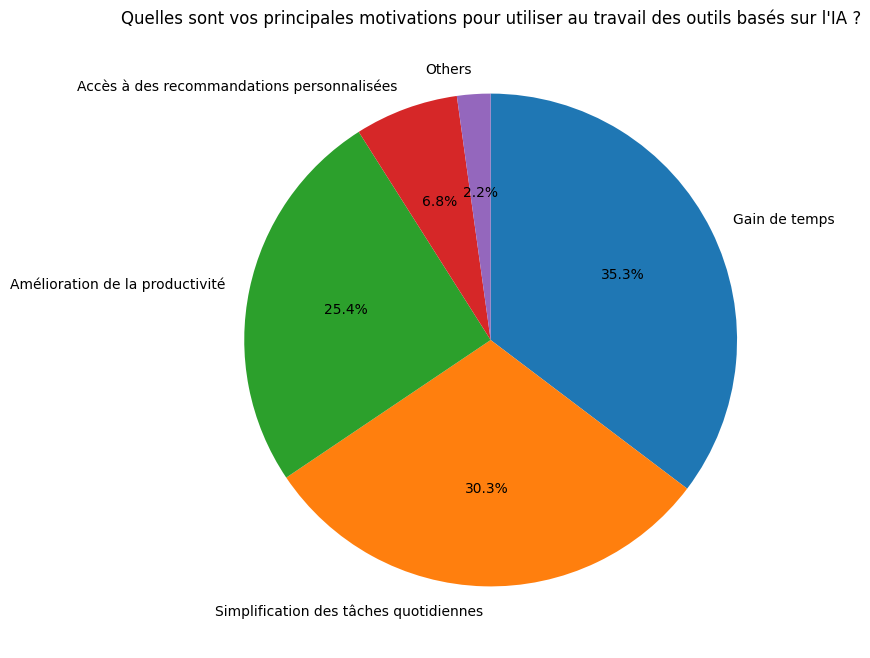

In [ ]:
plot_pie('motivations_for_using_ai', 'Quelles sont vos principales motivations pour utiliser au travail des outils basés sur l\'IA ?')

# ❓ 11. Dans le cas où vous auriez utilisé un outil avec de l’IA, avez-vous déjà rencontré des problèmes ou des désagréments liés à son utilisation ?
- [ ] 11/12 Confiance dans les décisions prises par les systèmes basés sur l'IA par problèmes rencontrés
- [ ] 11/13 Inquiétudes quant à l'impact de l'IA sur la vie professionnelle par problèmes rencontrés
- [ ] 11/14 Perception de la perte d'autonomie due à l'IA par problèmes rencontrés
- [ ] 11/15 Perception de la réduction des capacités de réflexion due à l'IA par problèmes rencontrés
- [ ] 11/16 Crainte de perdre son emploi à cause de l'IA par problèmes rencontrés
- [ ] 11/17 Autres inquiétudes face à l'arrivée de l'IA par problèmes rencontrés
- [ ] 11/18 Inclusion dans le développement d'outils basés sur l'IA par problèmes rencontrés
- [ ] 11/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par problèmes rencontrés
- [ ] 11/20 Inclination à utiliser l'IA après consultation par problèmes rencontrés
- [ ] 11/21 Disposition à suivre une formation sur les technologies basées sur l'IA par problèmes rencontrés
- [ ] 11/22 Commentaires et suggestions sur l'arrivée de l'IA par problèmes rencontrés

---

<Figure size 1200x800 with 0 Axes>

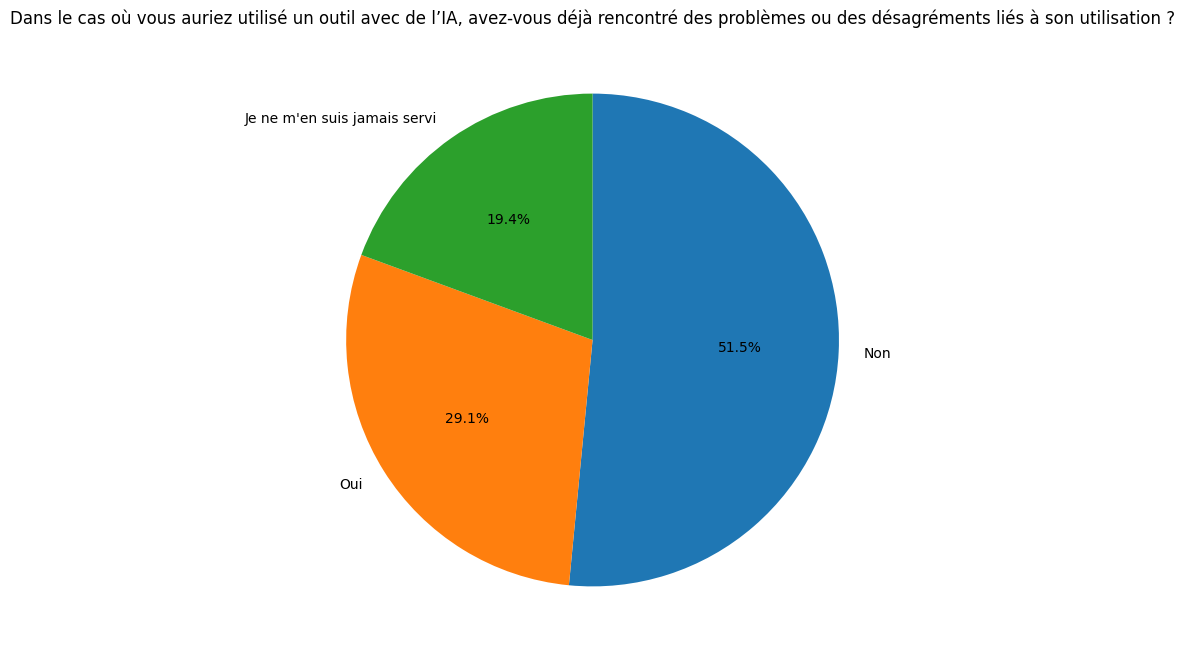

In [ ]:
plot_pie('issues_with_ai', 'Dans le cas où vous auriez utilisé un outil avec de l’IA, avez-vous déjà rencontré des problèmes ou des désagréments liés à son utilisation ?')

# ❓ 12. Comment évaluez-vous votre confiance dans les décisions prises par les systèmes basés sur l'IA ?
- [ ] 12/13 Inquiétudes quant à l'impact de l'IA sur la vie professionnelle par confiance dans l'IA
- [ ] 12/14 Perception de la perte d'autonomie due à l'IA par confiance dans l'IA
- [ ] 12/15 Perception de la réduction des capacités de réflexion due à l'IA par confiance dans l'IA
- [ ] 12/16 Crainte de perdre son emploi à cause de l'IA par confiance dans l'IA
- [ ] 12/17 Autres inquiétudes face à l'arrivée de l'IA par confiance dans l'IA
- [ ] 12/18 Inclusion dans le développement d'outils basés sur l'IA par confiance dans l'IA
- [ ] 12/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par confiance dans l'IA
- [ ] 12/20 Inclination à utiliser l'IA après consultation par confiance dans l'IA
- [x] 12/21 Disposition à suivre une formation sur les technologies basées sur l'IA par confiance dans l'IA
- [ ] 12/22 Commentaires et suggestions sur l'arrivée de l'IA par confiance dans l'IA

---

<Figure size 1200x800 with 0 Axes>

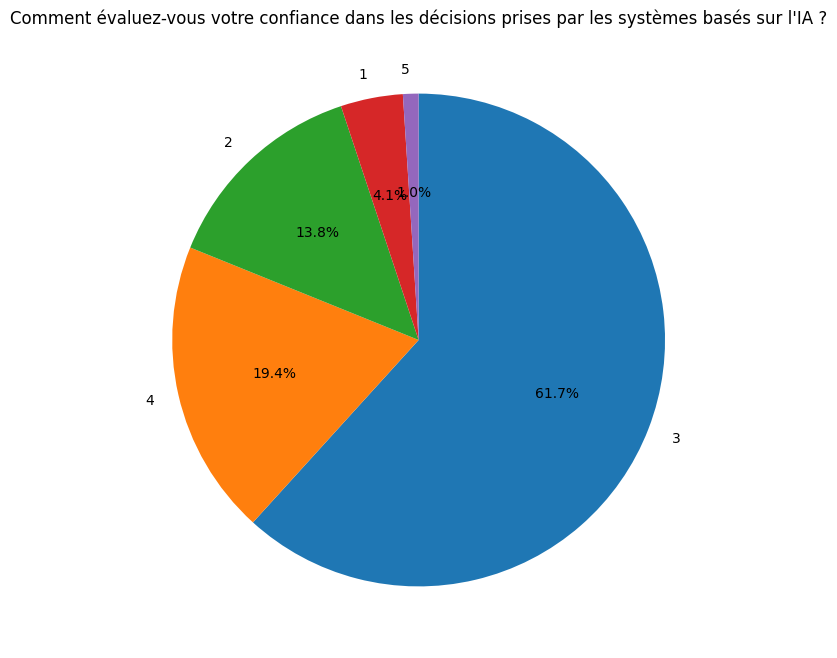

In [ ]:
plot_pie('trust_in_ai_decisions', 'Comment évaluez-vous votre confiance dans les décisions prises par les systèmes basés sur l\'IA ?')

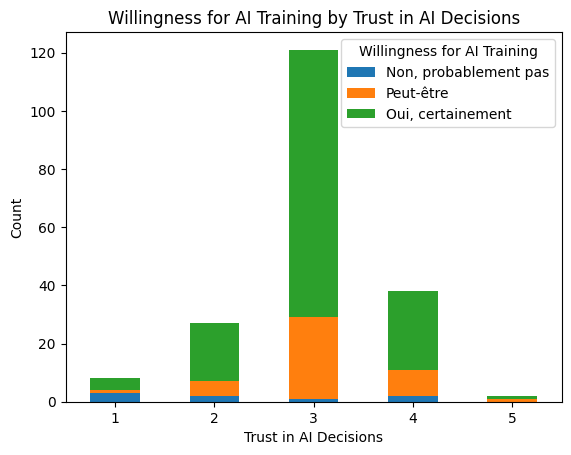

In [ ]:
# 12/21 Willingness for AI Training by Trust in AI Decisions
training_trust = df_survey.groupby('trust_in_ai_decisions')[
  'willingness_for_ai_training'
].value_counts().unstack().reindex(columns=[
    'Non, probablement pas',
    'Peut-être',
    'Oui, certainement'
]).plot(kind='bar', stacked=True)
plt.title('Willingness for AI Training by Trust in AI Decisions')
plt.xlabel('Trust in AI Decisions')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Willingness for AI Training')
plt.show()

# ❓ 13. Avez-vous des inquiétudes quant à la manière dont l’IA peut affecter votre vie professionnelle ?
- [ ] 13/14 Perception de la perte d'autonomie due à l'IA par inquiétudes
- [ ] 13/15 Perception de la réduction des capacités de réflexion due à l'IA par inquiétudes
- [ ] 13/16 Crainte de perdre son emploi à cause de l'IA par inquiétudes
- [ ] 13/17 Autres inquiétudes face à l'arrivée de l'IA par inquiétudes
- [ ] 13/18 Inclusion dans le développement d'outils basés sur l'IA par inquiétudes
- [ ] 13/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par inquiétudes
- [ ] 13/20 Inclination à utiliser l'IA après consultation par inquiétudes
- [ ] 13/21 Disposition à suivre une formation sur les technologies basées sur l'IA par inquiétudes
- [ ] 13/22 Commentaires et suggestions sur l'arrivée de l'IA par inquiétudes

---

<Figure size 1200x800 with 0 Axes>

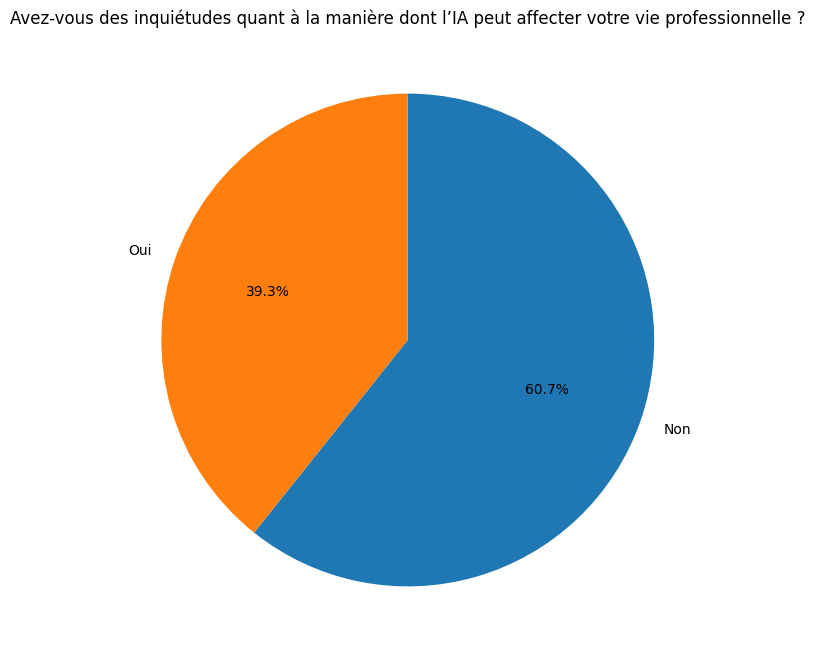

In [ ]:
plot_pie('concerns_about_ai_impact', 'Avez-vous des inquiétudes quant à la manière dont l’IA peut affecter votre vie professionnelle ?')

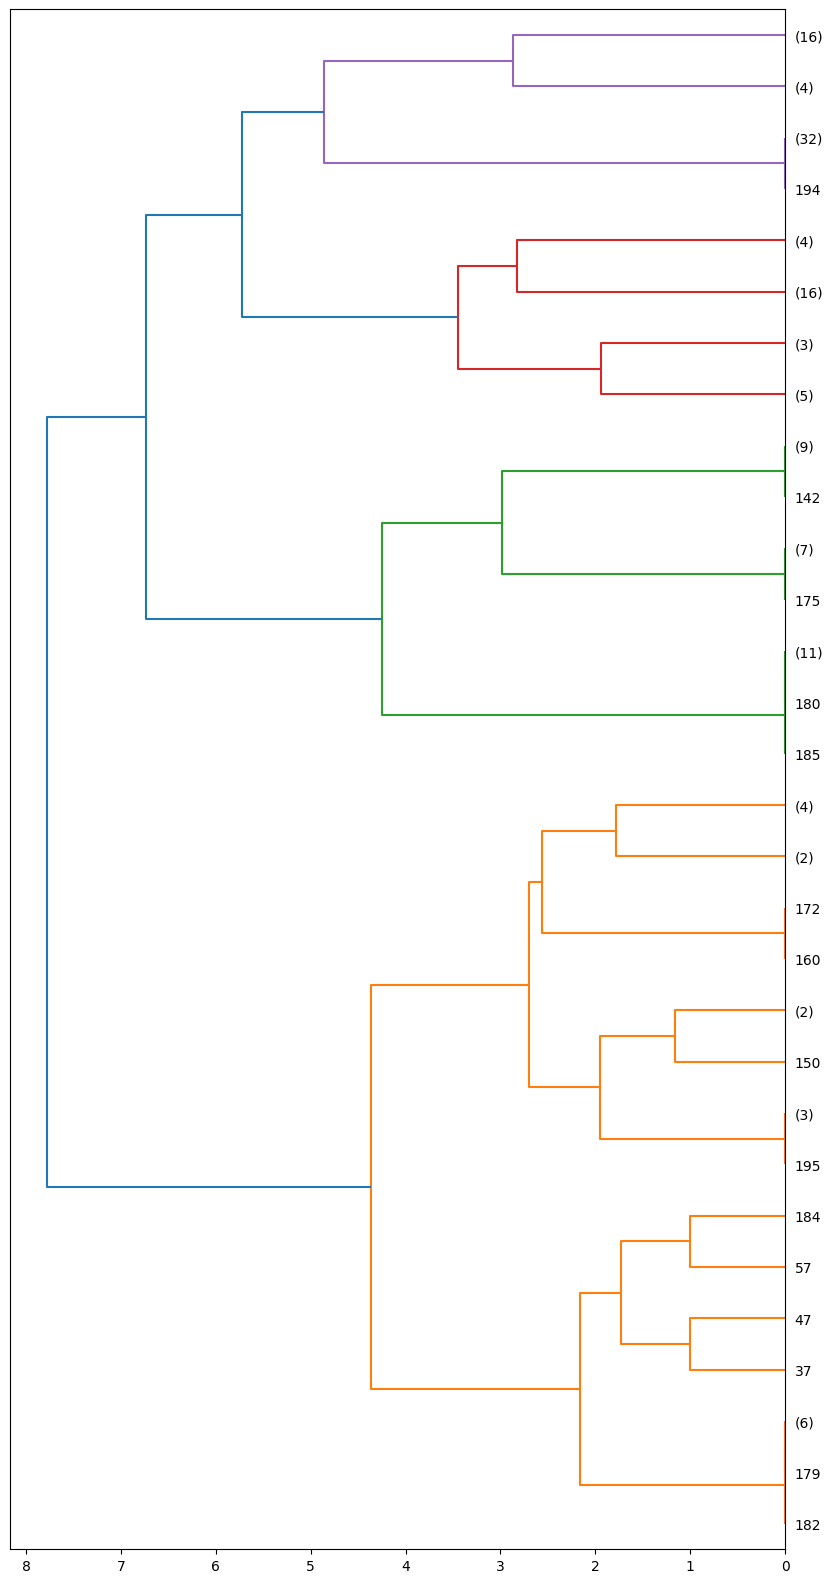

In [ ]:
# Convert binary responses to numeric values
binary_columns = [
  "resistant_to_ai",
  "issues_with_ai",
  "concerns_about_ai_impact",
  "fear_of_job_loss_due_to_ai",
  "involved_in_ai_development",
  "want_to_be_consulted_on_ai_development",
  "impact_of_being_consulted_on_ai_use"
]

df_binary_tree = df_survey[df_survey["issues_with_ai"] != "Je ne m'en suis jamais servi"]
df_binary_tree = df_binary_tree.dropna(subset=binary_columns)

# Convert binary responses to numeric values
for column in binary_columns:
  df_binary_tree[column] = df_binary_tree[column].map({
    'Oui': 1,
    'Non': 0
  })

# Drop any new NaN values
df_binary_tree = df_binary_tree.dropna(subset=binary_columns)

# Select only the binary columns
df_binary = df_binary_tree[binary_columns]

plt.figure(figsize=(10, 20))

# Calculate the distance between each sample
Z = hierarchy.linkage(df_binary, 'ward')

hierarchy.dendrogram(Z, orientation="left", truncate_mode = 'level', p=4, labels=df_binary.index)
plt.show()

In [ ]:
# resistant_to_ai > issues_with_ai > concerns_about_ai_impact > fear_of_job_loss_due_to_ai >
# > involved_in_ai_development > want_to_be_consulted_on_ai_development > impact_of_being_consulted_on_ai_use
binary_columns = [
  "resistant_to_ai",
  "issues_with_ai",
  "concerns_about_ai_impact",
  "fear_of_job_loss_due_to_ai",
  "involved_in_ai_development",
  "want_to_be_consulted_on_ai_development",
  "impact_of_being_consulted_on_ai_use"
]
df_bin_tree = df_survey[binary_columns]
df_bin_tree = df_bin_tree[df_bin_tree["issues_with_ai"] != "Je ne m'en suis jamais servi"]
df_bin_tree = df_bin_tree[df_bin_tree["involved_in_ai_development"] != "Mon entreprise n'utilise pas l’IA"]
df_bin_tree = df_bin_tree.dropna(subset=binary_columns)

# Convert binary responses to numeric values
for column in df_bin_tree.columns:
  df_bin_tree[column] = df_bin_tree[column].map({
    'Oui': 1,
    'Non': 0
  })

df_bin_tree = df_bin_tree.reset_index()  # make sure indexes pair with number of rows

sankey_dict = {}

for index, row in df_bin_tree.iterrows():
  key = ""
  for depth in range(len(binary_columns) - 1):
    key = key + str(row[binary_columns[depth]])
    if key not in sankey_dict:
      sankey_dict[key] = 1
    else:
      sankey_dict[key] += 1

# Create a DataFrame for the Sankey diagram
df_sankey = pd.DataFrame(columns=['source', 'target', 'value'])

sankey_dict_ids = {
  'root': 0
}
for key in sankey_dict.keys():
  sankey_dict_ids[key] = len(sankey_dict_ids)

labels = []

for key, value in sankey_dict.items():
  if len(key) <= 1:
    source = 'root'
  else:
    source = key[:-1]
  df_sankey.loc[len(df_sankey)] = {
      'source': sankey_dict_ids[source],
      'target': sankey_dict_ids[key],
      'value': value
    }
  if len(key) < len(binary_columns) - 1:
    labels.append(binary_columns[len(key)-1] + ' = ' + key[-1].replace('0', 'Non').replace('1', 'Oui'))
  else:
    labels.append('end')


x_positions = [(i + .01) / (len(binary_columns) - 1) for i in range(len(binary_columns))]
y_positions = [i / (len(labels) - 1) for i in range(len(labels))]

fig = go.Figure(data=[go.Sankey(
  node = dict(
    line = dict(color = "black", width = 0.5),
    label = labels,
    x = x_positions,
    y = y_positions,
  ),
  link = dict(
    source = df_sankey['source'],
    target = df_sankey['target'],
    value = df_sankey['value']
  )
)], layout=go.Layout(height=800))

fig.show()

In [ ]:

#todo mettre en rapport les questions 13 14 15 16

# ❓ 14. Dans quelle mesure pensez-vous que l'IA pourrait vous faire perdre votre autonomie ?
- [ ] 14/15 Perception de la réduction des capacités de réflexion due à l'IA par perception de la perte d'autonomie
- [ ] 14/16 Crainte de perdre son emploi à cause de l'IA par perception de la perte d'autonomie
- [ ] 14/17 Autres inquiétudes face à l'arrivée de l'IA par perception de la perte d'autonomie
- [ ] 14/18 Inclusion dans le développement d'outils basés sur l'IA par perception de la perte d'autonomie
- [ ] 14/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par perception de la perte d'autonomie
- [ ] 14/20 Inclination à utiliser l'IA après consultation par perception de la perte d'autonomie
- [ ] 14/21 Disposition à suivre une formation sur les technologies basées sur l'IA par perception de la perte d'autonomie
- [ ] 14/22 Commentaires et suggestions sur l'arrivée de l'IA par perception de la perte d'autonomie

---

<Figure size 1200x800 with 0 Axes>

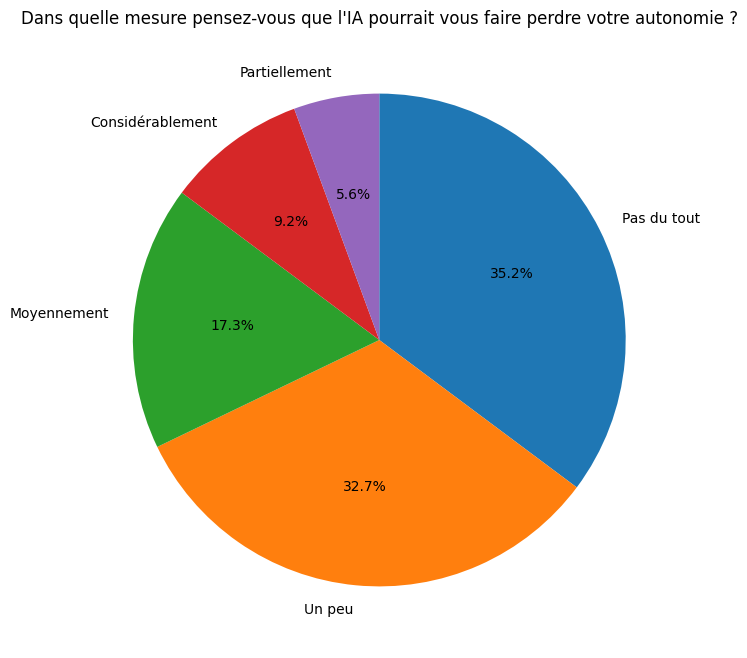

In [ ]:
plot_pie('loss_of_autonomy_due_to_ai', 'Dans quelle mesure pensez-vous que l\'IA pourrait vous faire perdre votre autonomie ?')

# ❓ 15. Dans quelle mesure pensez-vous que l'IA pourrait réduire vos capacités de réflexions ?
- [ ] 15/16 Crainte de perdre son emploi à cause de l'IA par perception de la réduction des capacités de réflexion
- [ ] 15/17 Autres inquiétudes face à l'arrivée de l'IA par perception de la réduction des capacités de réflexion
- [ ] 15/18 Inclusion dans le développement d'outils basés sur l'IA par perception de la réduction des capacités de réflexion
- [ ] 15/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par perception de la réduction des capacités de réflexion
- [ ] 15/20 Inclination à utiliser l'IA après consultation par perception de la réduction des capacités de réflexion
- [ ] 15/21 Disposition à suivre une formation sur les technologies basées sur l'IA par perception de la réduction des capacités de réflexion
- [ ] 15/22 Commentaires et suggestions sur l'arrivée de l'IA par perception de la réduction des capacités de réflexion

<Figure size 1200x800 with 0 Axes>

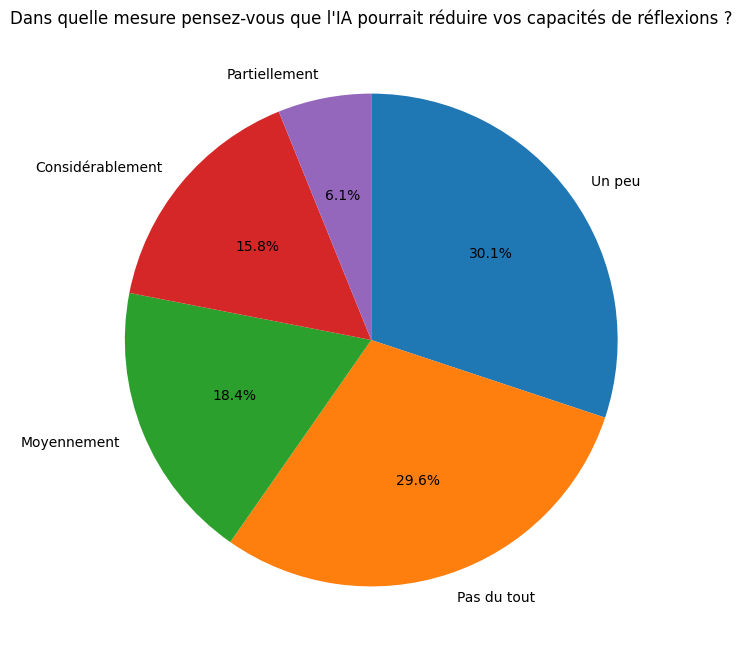

In [ ]:
plot_pie('reduced_thinking_due_to_ai', 'Dans quelle mesure pensez-vous que l\'IA pourrait réduire vos capacités de réflexions ?')

# ❓ 16. Craignez-vous que l'IA ne vous fasse perdre votre emploi ?
- [ ] 16/17 Autres inquiétudes face à l'arrivée de l'IA par crainte de perdre son emploi
- [ ] 16/18 Inclusion dans le développement d'outils basés sur l'IA par crainte de perdre son emploi
- [ ] 16/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par crainte de perdre son emploi
- [ ] 16/20 Inclination à utiliser l'IA après consultation par crainte de perdre son emploi
- [ ] 16/21 Disposition à suivre une formation sur les technologies basées sur l'IA par crainte de perdre son emploi
- [ ] 16/22 Commentaires et suggestions sur l'arrivée de l'IA par crainte de perdre son emploi

<Figure size 1200x800 with 0 Axes>

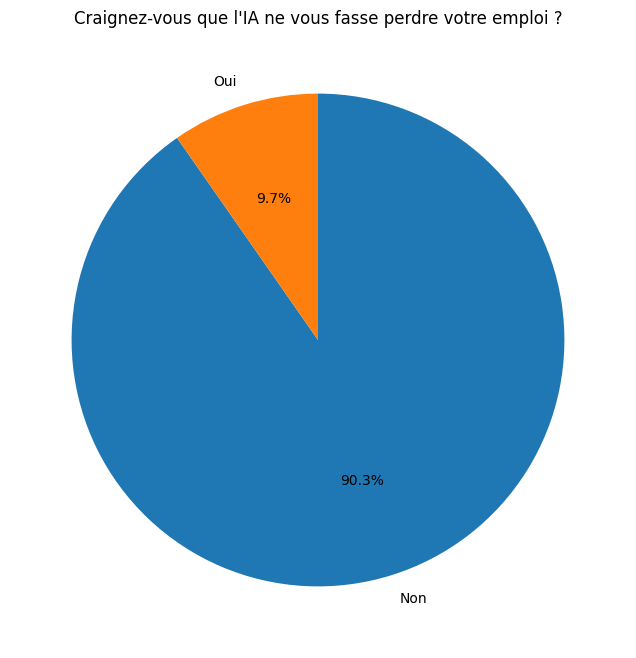

L'IA est encore trop bête pour ça, et je pense que j'ai le temps avant qu'elle devienne suffisamment intelligente pour me voler mon travail.
Métier de contrôle indispensable
L'utilisation de l'IA requiert un utilisateur disposant d'esprit critique et de culture de son métier pour valider la donnée obtenue par IA
L'IA doit être une aide mais la décision et le regard critique reste à ma main
Les taches à plus forte valeur ajoutée resteront à la main des humains
Mon domaine dactivite necessite du travail de terrain que l'IA ne peut pas effectuer et de lanalyse juridique. Tout les aspects de calculs et de dessins arctecturaux pourraient etre affecté, mais pas toute la profession pour autant.
xx
pas de crainte dans le métier de commercial B to C car il faut un contact humain qui peut aider à la prise de décision.
L'IA serait un atout pour augmenter en compétence.
Il y aura toujours besoin de relations humaines dans le cadre de mon métier
C'est un outil et seulement un outil.
La conduite de 

In [ ]:
plot_pie('fear_of_job_loss_due_to_ai', 'Craignez-vous que l\'IA ne vous fasse perdre votre emploi ?')

for response in df_survey['details_fear_of_job_loss'].dropna():
  print(response)

# ❓ 17. Avez-vous d’autres inquiétudes vis-à-vis de votre travail face à l’arrivée de l’IA ?
- [ ] 17/18 Inclusion dans le développement d'outils basés sur l'IA par autres inquiétudes face à l'arrivée de l'IA
- [ ] 17/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par autres inquiétudes face à l'arrivée de l'IA
- [ ] 17/20 Inclination à utiliser l'IA après consultation par autres inquiétudes face à l'arrivée de l'IA
- [ ] 17/21 Disposition à suivre une formation sur les technologies basées sur l'IA par autres inquiétudes face à l'arrivée de l'IA
- [ ] 17/22 Commentaires et suggestions sur l'arrivée de l'IA par autres inquiétudes face à l'arrivée de l'IA

<Figure size 1200x800 with 0 Axes>

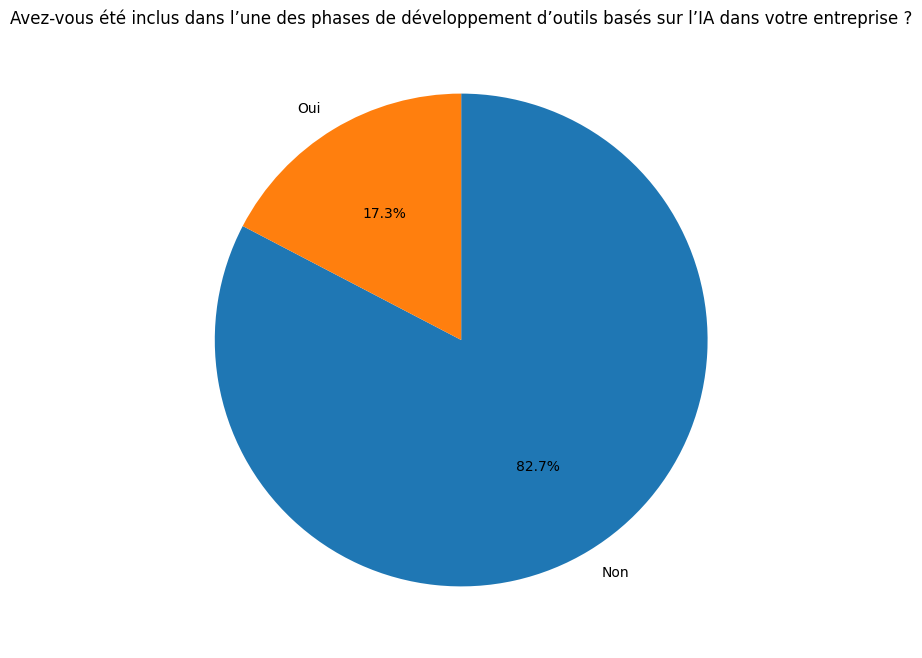

Les services externes d'IA sont une très grosse brèche de sécurité : je ne peux pas demander à ChatGPT d'écrire du code pour moi sans briser les clauses de non-divulgation de mon contrat. Au niveau de la génération d'images, on a également des risques au niveau des droits d'auteur, qui est encore quelque chose d'assez flou.
Ne pas savoir suffisamment bien l'utiliser au quotidien et perdre en productivité par rapport à d'autres qui auraient été mieux formés
Le fonctionnement de l’IA doit être transparent pour les utilisateurs et les algorithmes ouverts à tous afin de contrôler d’éventuels dysfonctionnements
l'accompagnement de l'entreprise et des collaborateurs : tous les embarquer
Un paresse d'esprit, vol de données, perte de la dimension humaine et affective,....
Grosse perte en compétence, du savoir-faire et manque d'humanité dans le travail (je ne suis pas travaillé avec une IA comme collègue). Cela doit rester un outil.
Non plus sur le domaine personnel (santé, organisme financier,

In [ ]:
plot_pie('other_concerns', 'Avez-vous été inclus dans l’une des phases de développement d’outils basés sur l’IA dans votre entreprise ?')

for response in df_survey['details_other_concerns'].dropna():
  print(response)

# ❓ 18. Avez-vous été inclus dans l’une des phases de développement d’outils basés sur l’IA dans votre entreprise ?
- [ ] 18/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par inclusion dans le développement d'outils basés sur l'IA
- [ ] 18/20 Inclination à utiliser l'IA après consultation par inclusion dans le développement d'outils basés sur l'IA
- [ ] 18/21 Disposition à suivre une formation sur les technologies basées sur l'IA par inclusion dans le développement d'outils basés sur l'IA
- [ ] 18/22 Commentaires et suggestions sur l'arrivée de l'IA par inclusion dans le développement d'outils basés sur l'IA

<Figure size 1200x800 with 0 Axes>

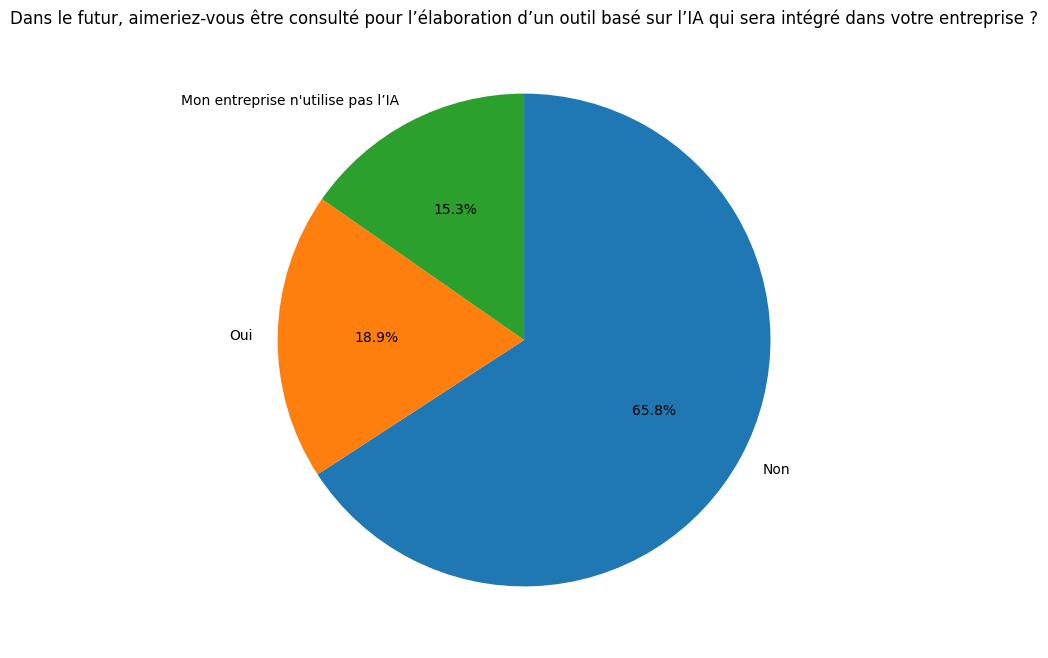

In [ ]:
plot_pie('involved_in_ai_development', 'Dans le futur, aimeriez-vous être consulté pour l’élaboration d’un outil basé sur l’IA qui sera intégré dans votre entreprise ?')

# ❓ 19. Dans le futur, aimeriez-vous être consulté pour l’élaboration d’un outil basé sur l’IA qui sera intégré dans votre entreprise ?
- [ ] 19/20 Inclination à utiliser l'IA après consultation par désir de consultation pour l'élaboration d'outils basés sur l'IA
- [ ] 19/21 Disposition à suivre une formation sur les technologies basées sur l'IA par désir de consultation pour l'élaboration d'outils basés sur l'IA
- [ ] 19/22 Commentaires et suggestions sur l'arrivée de l'IA par désir de consultation pour l'élaboration d'outils basés sur l'IA

<Figure size 1200x800 with 0 Axes>

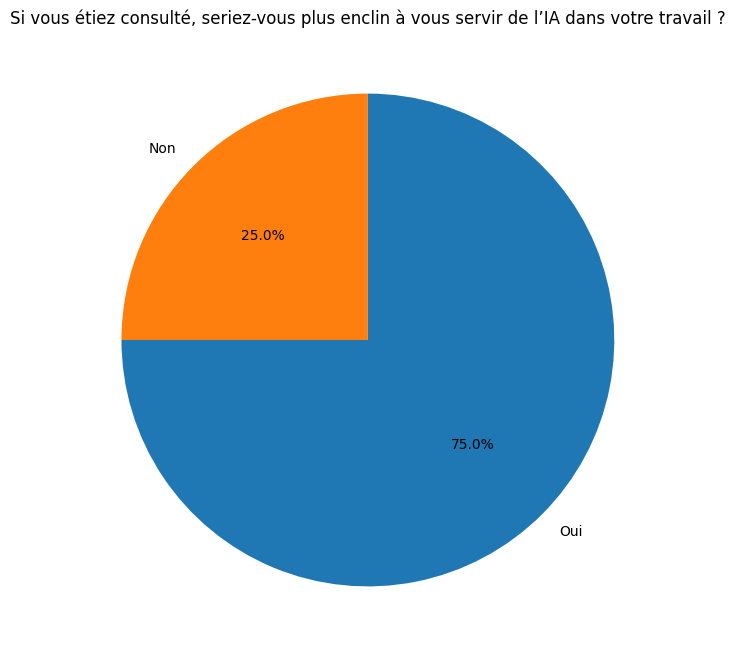

In [ ]:
plot_pie('want_to_be_consulted_on_ai_development', 'Si vous étiez consulté, seriez-vous plus enclin à vous servir de l’IA dans votre travail ?')

# ❓ 20. Si vous étiez consulté, seriez-vous plus enclin à vous servir de l’IA dans votre travail ?
- [ ] 20/21 Disposition à suivre une formation sur les technologies basées sur l'IA par inclination à utiliser l'IA après consultation
- [ ] 20/22 Commentaires et suggestions sur l'arrivée de l'IA par inclination à utiliser l'IA après consultation

<Figure size 1200x800 with 0 Axes>

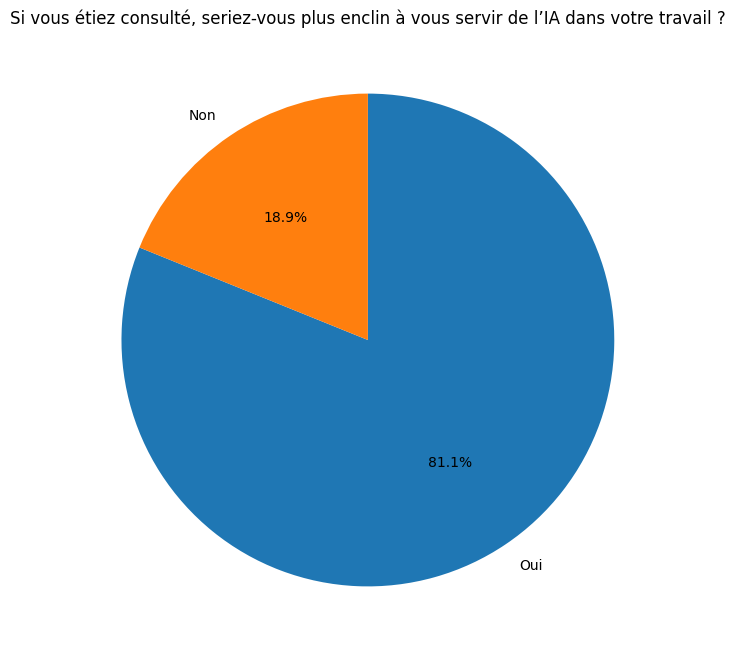

<Figure size 1200x800 with 0 Axes>

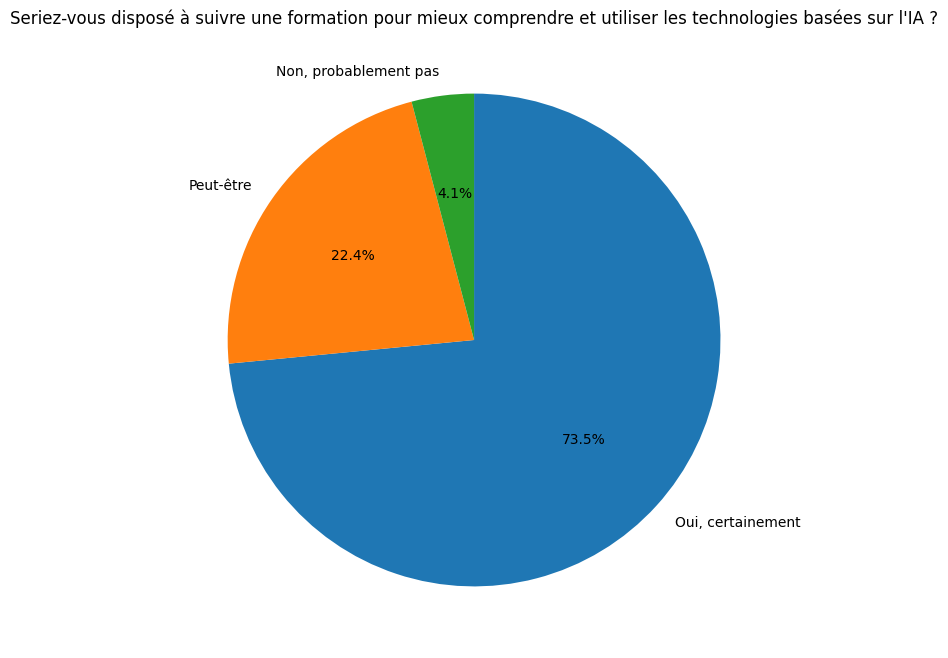

In [ ]:
plot_pie('impact_of_being_consulted_on_ai_use', 'Si vous étiez consulté, seriez-vous plus enclin à vous servir de l’IA dans votre travail ?')

plot_pie('willingness_for_ai_training', 'Seriez-vous disposé à suivre une formation pour mieux comprendre et utiliser les technologies basées sur l\'IA ?')
